








































# <p style="background-color: #F4511E; font-family: Times New Roman; color: black; font-size: 140%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>Chronic Kidney Disease Prediction</strong></p>

We will answerthe questions that come to our mind?
What does data look like? How many rows and columns are there? What they are?

# <p style="background-color: #FDD835; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>1. Data Loading and Overview</strong></p>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# set the style of matplotlib
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set()

In [3]:
# Load the dataset
df = pd.read_csv('kidney_disease.csv', index_col='id')
df.shape
df

age    bp     sg   al   su     rbc        pc         pcc          ba  \
id                                                                           
0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...  pcv    wc   rc  htn   dm cad appet   pe  ane classification  
id          ...                                                               
0    121.0  ...   44  7800  5.2  yes  yes  no  good   no   no            ckd  
1      NaN  ...   38  6000  NaN   no   no  no  good   no   no            ckd  
2    423.0  ...   31  7500  NaN   no  yes  no  poor   no  yes            ckd  
3    117.0  ...   32  6700  3.9  yes   no  no  poor  yes  yes            ckd  
4    106.0  ...   35  7300  4.6   no   no  no  good   no   no            ckd  
..     ...  ...  ...   ...  ...  ...  ...  ..   ...  ...  ...            ...  
395  140.0  ...   47  6700  4.9   no   no  no  good   no   no         notckd  
396   75.0  ...   54  7800  6.2   no   no  no  good   no   no         notckd  
397  100.0  ...   49  6600  5.4   no   no  no  good   no   no         notckd  
398  114.0  ...   51  7200  5.9   no   no  no  good   no   no         notckd  
399  131.0  ...   53  6800  6.1   no   no  no  good   no   no         notckd  

[400 rows x 25 columns]

The dataset contains **400 rows** (400 patient records) and **25 columns** (25 features).


In [4]:
# View the overall information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    object 


In all there are **25 features**, of which last is Classification, the dependent variable.
Features are mainly of **2 types**: 
1. Numerical  (float64) - 11 features
age, bp(blood_pressure), sg(specific_gravity), al(albumin), su(sugar) ; bgr(blood_glucose_random), bu(blood_urea),sc(serun_creatinine),sod (sodium), pot(potassium), hemo(hemoglobin)            
 

2. Categorical (object ) - 14  features
rbc(red_blood_cells), pc(pus_cell), pcc(pus_cell_count), ba(bacteria) ; pcv(packed_Cell_volume), wc(white_blood_cells_count), rc(red_blood_cells_count); htn(hypertension),  dm(diabetes_mellitus), cad(coronory_artery_disease), appet(appetite), pe(pedal_edema), ane(anemia),  class(ckd or notckd) 


All column names must be changed to make them meaningful or complete.

Let us have a look at few rows.

Out of 400 how many are CKD and how many are not?

In [5]:
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

All 'ckd\t' must be replaced by 'ckd'

In [199]:
df.head()

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
id                                                                            
0   48.0            80.0             1.020      1.0    0.0                0   
1    7.0            50.0             1.020      4.0    0.0                0   
2   62.0            80.0             1.010      2.0    3.0                1   
3   48.0            70.0             1.005      4.0    0.0                1   
4   51.0            80.0             1.010      2.0    0.0                1   

    pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
id                                                             ...   
0          1                0         0            121.000000  ...   
1          1                0         0            264.438462  ...   
2          1                0         0            423.000000  ...   
3          0                1         0            117.000000  ...   
4          1                0         0            106.000000  ...   

    packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
id                                                                     
0                 44.0                  7800.0              5.200000   
1                 38.0                  6000.0              3.517405   
2                 31.0                  7500.0              3.389510   
3                 32.0                  6700.0              3.900000   
4                 35.0                  7300.0              4.600000   

    hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
id                                                                       
0              1                  1                        0         0   
1              0                  0                        0         0   
2              0                  1                        0         1   
3              1                  0                        0         1   
4              0                  0                        0         0   

    pedal_edema  anemia  class  
id                              
0             0       0      1  
1             0       0      1  
2             0       1      1  
3             1       1      1  
4             0       0      1  

[5 rows x 25 columns]

In [6]:
# View the description of the dataset
df.describe()

age          bp          sg          al          su         bgr  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  356.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142  148.036517   
std     17.169714   13.683637    0.005717    1.352679    1.099191   79.281714   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000   99.000000   
50%     55.000000   80.000000    1.020000    0.000000    0.000000  121.000000   
75%     64.500000   80.000000    1.020000    2.000000    0.000000  163.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo  
count  381.000000  383.000000  313.000000  312.000000  348.000000  
mean    57.425722    3.072454  137.528754    4.627244   12.526437  
std     50.503006    5.741126   10.408752    3.193904    2.912587  
min      1.500000    0.400000    4.500000    2.500000    3.100000  
25%     27.000000    0.900000  135.000000    3.800000   10.300000  
50%     42.000000    1.300000  138.000000    4.400000   12.650000  
75%     66.000000    2.800000  142.000000    4.900000   15.000000  
max    391.000000   76.000000  163.000000   47.000000   17.800000

Are theremissing values. What to do in that case?

In [7]:
# Check if the dataset has missing values
df.isna().sum().sort_values(ascending=False)

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

For rbc, 152 patients dont have values.If we remove rows with missing data then we are already having small dataset. 

For numerical columns , Should we fill with mean value, backward fill or forward fill or remove those rows.First fill with mean values.

For categorical columns, fill with mode value. 

# <p style="background-color: #FDD835; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>2. Data Rectification</strong></p>

In [8]:
# Rename columns to make them more readable
col={'age': 'age',
     'bp': 'blood_pressure',
     'sg': 'specific_gravity',
     'al': 'albumin',
     'su': 'sugar',
     'rbc': 'red_blood_cells',
     'pc': 'pus_cell',
     'pcc': 'pus_cell_clumps',
     'ba': 'bacteria',
     'bgr': 'blood_glucose_random',
     'bu': 'blood_urea',
     'sc': 'serum_creatinine',
     'sod': 'sodium',
     'pot': 'potassium',
     'hemo': 'hemoglobin',
     'pcv': 'packed_cell_volume',
     'wc': 'white_blood_cell_count',
     'rc': 'red_blood_cell_count',
     'htn': 'hypertension',
     'dm': 'diabetes_mellitus',
     'cad': 'coronary_artery_disease',
     'appet': 'appetite',
     'pe': 'pedal_edema',
     'ane': 'anemia',
     'classification': 'class'}
df.rename(columns=col, inplace=True)
df

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
id                                                                            
0    48.0            80.0             1.020      1.0    0.0             NaN   
1     7.0            50.0             1.020      4.0    0.0             NaN   
2    62.0            80.0             1.010      2.0    3.0          normal   
3    48.0            70.0             1.005      4.0    0.0          normal   
4    51.0            80.0             1.010      2.0    0.0          normal   
..    ...             ...               ...      ...    ...             ...   
395  55.0            80.0             1.020      0.0    0.0          normal   
396  42.0            70.0             1.025      0.0    0.0          normal   
397  12.0            80.0             1.020      0.0    0.0          normal   
398  17.0            60.0             1.025      0.0    0.0          normal   
399  58.0            80.0             1.025      0.0    0.0          normal   

     pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
id                                                               ...   
0      normal      notpresent  notpresent                 121.0  ...   
1      normal      notpresent  notpresent                   NaN  ...   
2      normal      notpresent  notpresent                 423.0  ...   
3    abnormal         present  notpresent                 117.0  ...   
4      normal      notpresent  notpresent                 106.0  ...   
..        ...             ...         ...                   ...  ...   
395    normal      notpresent  notpresent                 140.0  ...   
396    normal      notpresent  notpresent                  75.0  ...   
397    normal      notpresent  notpresent                 100.0  ...   
398    normal      notpresent  notpresent                 114.0  ...   
399    normal      notpresent  notpresent                 131.0  ...   

     packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
id                                                                      
0                    44                    7800                   5.2   
1                    38                    6000                   NaN   
2                    31                    7500                   NaN   
3                    32                    6700                   3.9   
4                    35                    7300                   4.6   
..                  ...                     ...                   ...   
395                  47                    6700                   4.9   
396                  54                    7800                   6.2   
397                  49                    6600                   5.4   
398                  51                    7200                   5.9   
399                  53                    6800                   6.1   

     hypertension  diabetes_mellitus coronary_artery_disease appetite  \
id                                                                      
0             yes                yes                      no     good   
1              no                 no                      no     good   
2              no                yes                      no     poor   
3             yes                 no                      no     poor   
4              no                 no                      no     good   
..            ...                ...                     ...      ...   
395            no                 no                      no     good   
396            no                 no                      no     good   
397            no                 no                      no     good   
398            no                 no                      no     good   
399            no                 no                      no     good   

    pedal_edema anemia   class  
id                              
0            no     no     ckd  
1            no     no     ckd  
2        

In [9]:
# View the overall information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               348 no

It can be seen that `packed_cell_volume`, `white_blood_cell_count`, and `red_blood_cell_count` are of object type. These will be converted to numerical type.

In [10]:
# Convert object type to numeric type
df['packed_cell_volume']     = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count']   = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')
df

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
id                                                                            
0    48.0            80.0             1.020      1.0    0.0             NaN   
1     7.0            50.0             1.020      4.0    0.0             NaN   
2    62.0            80.0             1.010      2.0    3.0          normal   
3    48.0            70.0             1.005      4.0    0.0          normal   
4    51.0            80.0             1.010      2.0    0.0          normal   
..    ...             ...               ...      ...    ...             ...   
395  55.0            80.0             1.020      0.0    0.0          normal   
396  42.0            70.0             1.025      0.0    0.0          normal   
397  12.0            80.0             1.020      0.0    0.0          normal   
398  17.0            60.0             1.025      0.0    0.0          normal   
399  58.0            80.0             1.025      0.0    0.0          normal   

     pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
id                                                               ...   
0      normal      notpresent  notpresent                 121.0  ...   
1      normal      notpresent  notpresent                   NaN  ...   
2      normal      notpresent  notpresent                 423.0  ...   
3    abnormal         present  notpresent                 117.0  ...   
4      normal      notpresent  notpresent                 106.0  ...   
..        ...             ...         ...                   ...  ...   
395    normal      notpresent  notpresent                 140.0  ...   
396    normal      notpresent  notpresent                  75.0  ...   
397    normal      notpresent  notpresent                 100.0  ...   
398    normal      notpresent  notpresent                 114.0  ...   
399    normal      notpresent  notpresent                 131.0  ...   

     packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
id                                                                      
0                  44.0                  7800.0                   5.2   
1                  38.0                  6000.0                   NaN   
2                  31.0                  7500.0                   NaN   
3                  32.0                  6700.0                   3.9   
4                  35.0                  7300.0                   4.6   
..                  ...                     ...                   ...   
395                47.0                  6700.0                   4.9   
396                54.0                  7800.0                   6.2   
397                49.0                  6600.0                   5.4   
398                51.0                  7200.0                   5.9   
399                53.0                  6800.0                   6.1   

     hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
id                                                                        
0             yes                yes                       no      good   
1              no                 no                       no      good   
2              no                yes                       no      poor   
3             yes                 no                       no      poor   
4              no                 no                       no      good   
..            ...                ...                      ...       ...   
395            no                 no                       no      good   
396            no                 no                       no      good   
397            no                 no                       no      good   
398            no                 no                       no      good   
399            no                 no                       no      good   

     pedal_edema anemia   class  
id                               
0             no     no     ckd  
1            

In [11]:
# Classify columns: categorical columns and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype=='object']
num_cols = [col for col in df.columns if df[col].dtype!='object']

In [12]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia',
 'class']

In [13]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [14]:
# View the specific values in the categorical columns
for col in cat_cols:
    print(f'{col} has {df[col].unique()} values\n')

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

pedal_edema has ['no' 'yes' nan] values

anemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [15]:
# View the specific values in the numeric column
for col in num_cols:
    print(f'{col} has {df[col].unique()} values\n')

age has [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] values

blood_pressure has [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] values

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] values

albumin has [ 1.  4.  2.  3.  0. nan  5.] values

sugar has [ 0.  3.  4.  1. nan  2.  5.] values

blood_glucose_random has [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 115.  89. 

In [16]:
df['age'][df['class'] == 'ckd'].count()

240

In [17]:
# Replace non-standard values
df['diabetes_mellitus'].replace(to_replace={'\tno':'no',
                                            '\tyes':'yes',
                                            ' yes':'yes'},
                                inplace=True)
df['coronary_artery_disease'].replace(to_replace={'\tno':'no'},
                                      inplace=True)
df['class'].replace(to_replace={'ckd\t':'ckd',
                                'notckd':'not ckd'},
                    inplace=True)

In [18]:
df.groupby('class').count()

age  blood_pressure  specific_gravity  albumin  sugar  \
class                                                            
ckd      242             240               208      209    206   
not ckd  149             148               145      145    145   

         red_blood_cells  pus_cell  pus_cell_clumps  bacteria  \
class                                                           
ckd                  107       194              250       250   
not ckd              141       141              146       146   

         blood_glucose_random  ...  hemoglobin  packed_cell_volume  \
class                          ...                                   
ckd                       212  ...         204                 183   
not ckd                   144  ...         144                 146   

         white_blood_cell_count  red_blood_cell_count  hypertension  \
class                                                                 
ckd                         151                   126           250   
not ckd                     143                   143           148   

         diabetes_mellitus  coronary_artery_disease  appetite  pedal_edema  \
class                                                                        
ckd                    250                      250       250          250   
not ckd                148                      148       149          149   

         anemia  
class            
ckd         250  
not ckd     149  

[2 rows x 24 columns]

In [19]:
# Convert the 'class' column to binary numeric form (1 and 0)
df['class'] = df['class'].map({'ckd':1, 'not ckd':0})
df['class'] = pd.to_numeric(df['class'], errors='coerce')
df.describe()

age  blood_pressure  specific_gravity     albumin       sugar  \
count  391.000000      388.000000        353.000000  354.000000  351.000000   
mean    51.483376       76.469072          1.017408    1.016949    0.450142   
std     17.169714       13.683637          0.005717    1.352679    1.099191   
min      2.000000       50.000000          1.005000    0.000000    0.000000   
25%     42.000000       70.000000          1.010000    0.000000    0.000000   
50%     55.000000       80.000000          1.020000    0.000000    0.000000   
75%     64.500000       80.000000          1.020000    2.000000    0.000000   
max     90.000000      180.000000          1.025000    5.000000    5.000000   

       blood_glucose_random  blood_urea  serum_creatinine      sodium  \
count            356.000000  381.000000        383.000000  313.000000   
mean             148.036517   57.425722          3.072454  137.528754   
std               79.281714   50.503006          5.741126   10.408752   
min               22.000000    1.500000          0.400000    4.500000   
25%               99.000000   27.000000          0.900000  135.000000   
50%              121.000000   42.000000          1.300000  138.000000   
75%              163.000000   66.000000          2.800000  142.000000   
max              490.000000  391.000000         76.000000  163.000000   

        potassium  hemoglobin  packed_cell_volume  white_blood_cell_count  \
count  312.000000  348.000000          329.000000              294.000000   
mean     4.627244   12.526437           38.884498             8406.122449   
std      3.193904    2.912587            8.990105             2944.474190   
min      2.500000    3.100000            9.000000             2200.000000   
25%      3.800000   10.300000           32.000000             6500.000000   
50%      4.400000   12.650000           40.000000             8000.000000   
75%      4.900000   15.000000           45.000000             9800.000000   
max     47.000000   17.800000           54.000000            26400.000000   

       red_blood_cell_count       class  
count            269.000000  400.000000  
mean               4.707435    0.625000  
std                1.025323    0.484729  
min                2.100000    0.000000  
25%                3.900000    0.000000  
50%                4.800000    1.000000  
75%                5.400000    1.000000  
max                8.000000    1.000000

In [20]:
df.groupby('class').count()

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
class                                                                           
0      149             148               145      145    145              141   
1      242             240               208      209    206              107   

       pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
class                                                             ...   
0           141              146       146                   144  ...   
1           194              250       250                   212  ...   

       hemoglobin  packed_cell_volume  white_blood_cell_count  \
class                                                           
0             144                 146                     143   
1             204                 183                     151   

       red_blood_cell_count  hypertension  diabetes_mellitus  \
class                                                          
0                       143           148                148   
1                       126           250                250   

       coronary_artery_disease  appetite  pedal_edema  anemia  
class                                                          
0                          148       149          149     149  
1                          250       250          250     250  

[2 rows x 24 columns]

In [21]:
cols = ['hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in cols:
    print(f'{col} has {df[col].unique()} values\n')

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [1 0] values



# <p style="background-color: #FDD835; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>3. Exploratory Data Analysis</strong></p>

## Analysis of categorical variables.

1. Out of 400 rows, How many are CKD(250) and how many are NOT_CKD(150).

2. Now we will see all categorical variables values for CKD and NOT_CKD.


In [22]:
df_ckd = df.loc[df['class'] == 1]
df_ckd.shape

(250, 25)

In [23]:
df_notckd = df.loc[df['class'] == 0]
df_notckd.shape

(150, 25)

In [24]:
# Example
# Create a data frame of class counts
df_class_counts = df['class'].value_counts().sort_index()
print(df_class_counts)

class
0    150
1    250
Name: count, dtype: int64


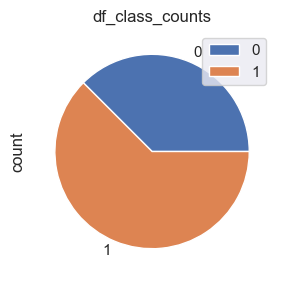

In [25]:

# Plot a pie chart
df_class_counts.plot(kind='pie', title='df_class_counts',figsize=(3,3))

plt.legend()
plt.show()

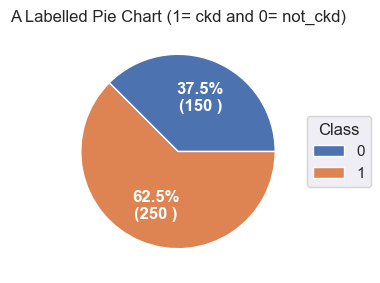

In [26]:
# Create a Figure and get its axes using subplots
fig, ax = plt.subplots(figsize=(3, 3), subplot_kw=dict(aspect="equal"))


# Prepare data
types = [x   for x in (df_class_counts.index.values) ]
values = [x   for x in (df_class_counts.values) ]

# Lambda function
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} )".format(pct, absolute)

# ax.pie
wedges, texts, autotexts = ax.pie(values, autopct=lambda pct: func(pct, values),textprops=dict(color="w"))

ax.legend(wedges, types,
          title="Class",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


ax.set_title("A Labelled Pie Chart (1= ckd and 0= not_ckd)")



plt.setp(autotexts, size=12, weight="bold")

plt.show()

In [27]:
#Create List from numpy array using List comprehension
types = [x   for x in (df_class_counts.index.values) ]
values = [x   for x in (df_class_counts.values) ]
print(types)
print(values)

[0, 1]
[150, 250]


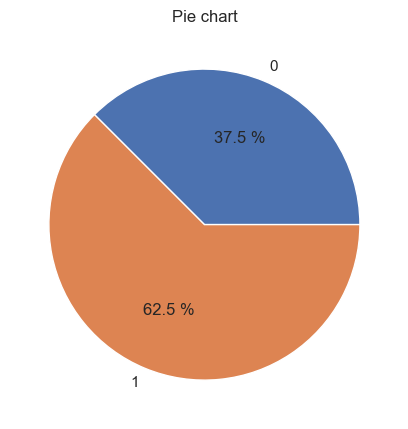

In [28]:
#Quick Recipe for Pie  
#https://www.kaggle.com/shuan3/melboune-real-estate-market-comprehensive-analysis#Melboune-house-project-Layout
plt.pie(values,labels=types,autopct='%.1f %%')
plt.title('Pie chart')
plt.show()

In [29]:

grouped_by_class_and_hypertension = df.groupby(['class', 'hypertension'])  


grouped_by_class_and_hypertension.describe()

age                                                      \
                    count       mean        std   min   25%   50%   75%   max   
class hypertension                                                              
0     no            147.0  46.408163  15.708716  12.0  34.0  46.0  58.0  80.0   
1     no            100.0  46.020000  20.687663   2.0  34.0  50.0  62.0  78.0   
      yes           142.0  60.542254  11.338520  15.0  54.0  61.0  68.0  90.0   

                   blood_pressure             ... white_blood_cell_count  \
                            count       mean  ...                    75%   
class hypertension                            ...                          
0     no                    146.0  71.438356  ...                 9200.0   
1     no                     95.0  77.052632  ...                11200.0   
      yes                   145.0  81.310345  ...                10275.0   

                            red_blood_cell_count                           \
                        max                count      mean       std  min   
class hypertension                                                          
0     no            11000.0                141.0  5.382270  0.599677  4.4   
1     no            19100.0                 30.0  4.356667  0.719523  2.7   
      yes           26400.0                 96.0  3.816667  0.870047  2.1   

                                          
                    25%  50%    75%  max  
class hypertension                        
0     no            4.9  5.3  5.900  6.5  
1     no            3.9  4.3  4.775  6.0  
      yes           3.3  3.8  4.300  8.0  

[3 rows x 112 columns]

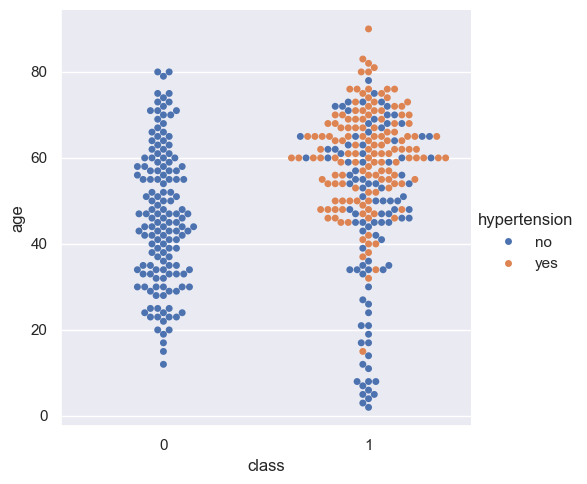

In [30]:
sns.catplot(data=df, x="class", y="age", hue="hypertension", kind="swarm")

Above graph means, 
1. For all cases where CKD is 0, there Hypertension is NO.
2. For all cases where CKD =1, there Hypertension can be YES as well as NO.


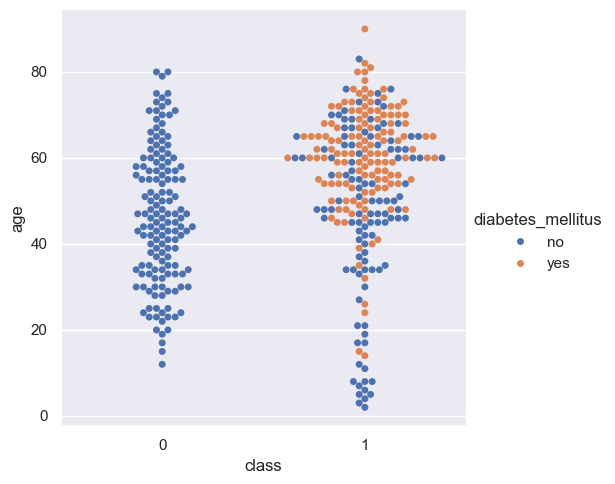

In [31]:
sns.catplot(data=df, x="class", y="age", hue="diabetes_mellitus", kind="swarm")

Above graph means, 
1. For all cases where CKD is 0, there diabetes_mellitus is NO.
2. For all cases where CKD =1, there diabetes_mellitus can be YES as well as NO.


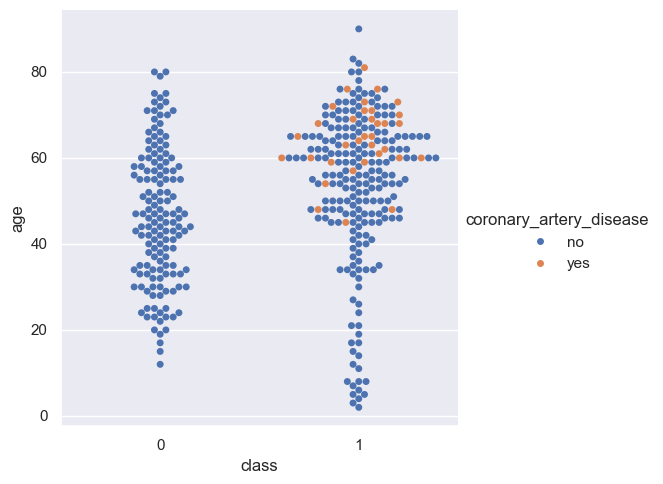

In [32]:
sns.catplot(data=df, x="class", y="age", hue="coronary_artery_disease", kind="swarm")

Above graph means, 
1. For all cases where CKD is 0, there coronary_artery_disease is NO.
2. For all cases where CKD =1, there coronary_artery_disease can be YES as well as NO.


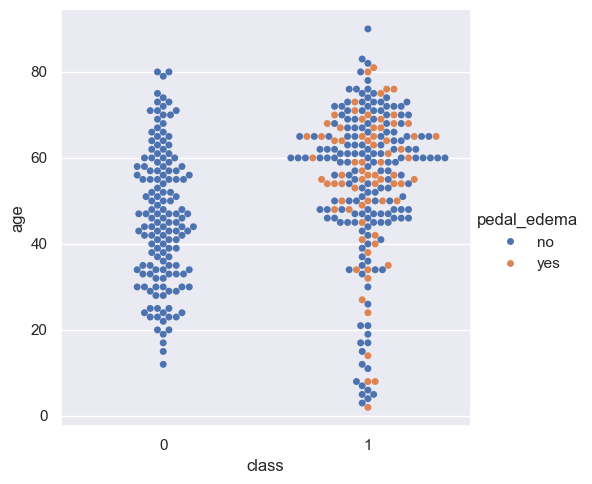

In [33]:

sns.catplot(data=df, x="class", y="age", hue="pedal_edema", kind="swarm")

Above graph means, 
1. For all cases where CKD is 0, there pedal_edema is NO.
2. For all cases where CKD =1, there pedal_edema can be YES as well as NO.

#### Anemia

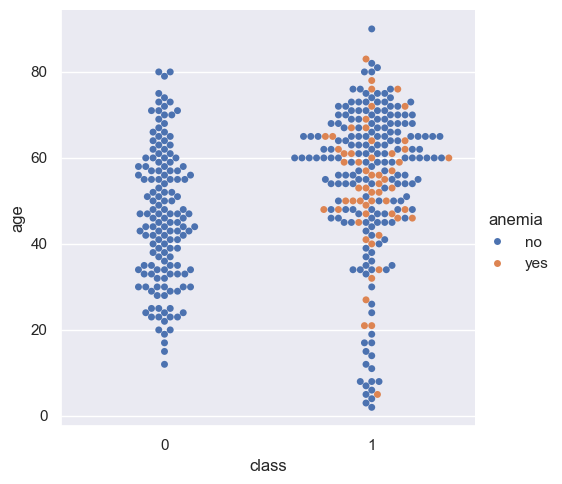

In [34]:
sns.catplot(data=df, x="class", y="age", hue="anemia", kind="swarm")

Above graph means, 
1. For all cases where CKD is 0, there anemia is NO.
2. For all cases where CKD =1, there anemia can be YES as well as NO.

TOPSY TURVY

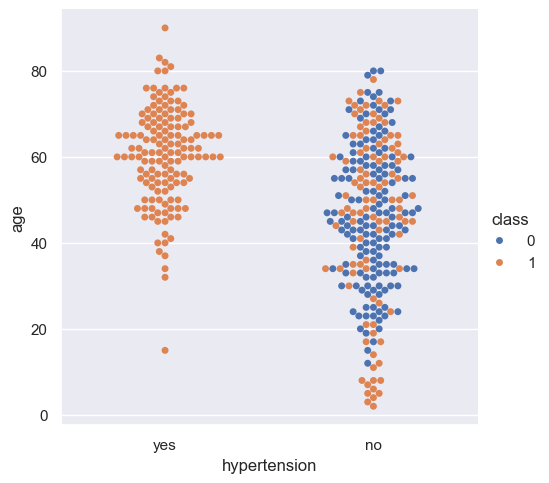

In [35]:
sns.catplot(data=df, x="hypertension", y="age", hue="class", kind="swarm")

Above graph means,
For all cases where Hypertension is YES, Class is 1(CKD).
For all cases where Hypertension is NO, Class can be 1(CKD) or 0(NOT_CKD) 

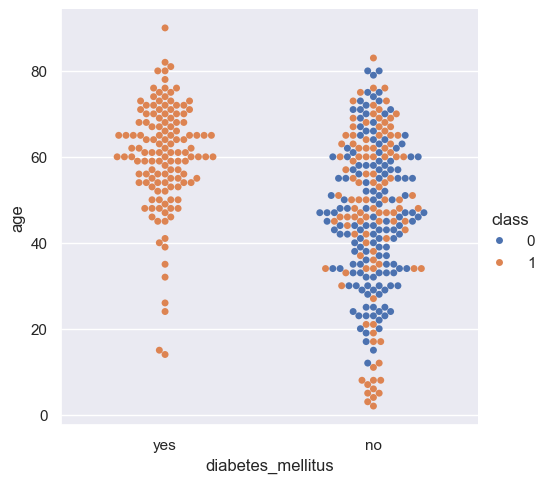

In [36]:
#diabetes_mellitus
sns.catplot(data=df, x="diabetes_mellitus", y="age", hue="class", kind="swarm")

Above graph means,
For all cases where diabetes_mellitus is YES, Class is 1(CKD).
For all cases where diabetes_mellitus is NO, Class can be 1(CKD) or 0(NOT_CKD) 

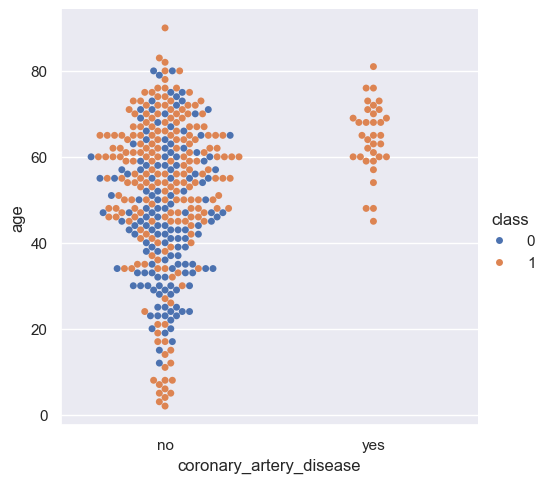

In [37]:
sns.catplot(data=df, x="coronary_artery_disease", y="age", hue="class", kind="swarm")

Above graph means,
For all cases where coronary_artery_disease is YES, Class is 1(CKD).
For all cases where coronary_artery_disease is NO, Class can be 1(CKD) or 0(NOT_CKD) 

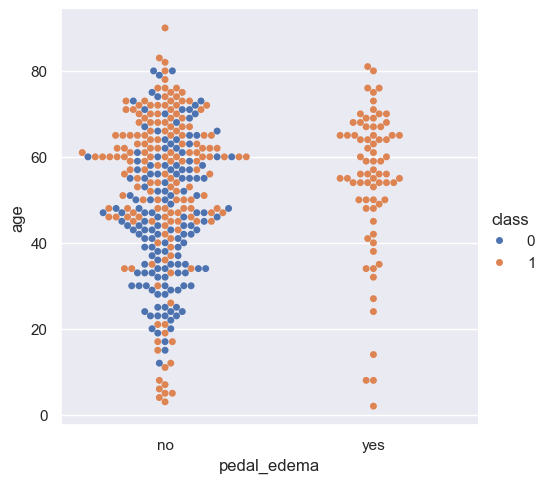

In [38]:
sns.catplot(data=df, x="pedal_edema", y="age", hue="class", kind="swarm")

Above graph means,
For all cases where pedal_edema is YES, Class is 1(CKD).
For all cases where pedal_edema is NO, Class can be 1(CKD) or 0(NOT_CKD) 

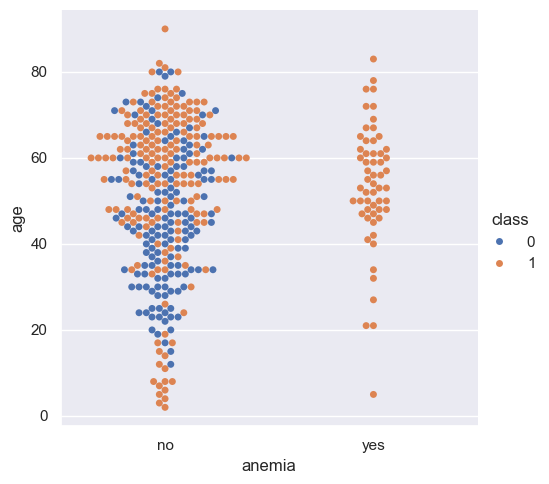

In [39]:
sns.catplot(data=df, x="anemia", y="age", hue="class", kind="swarm")

Above graph means,
For all cases where anemia is YES, Class is 1(CKD).
For all cases where anemia is NO, Class can be 1(CKD) or 0(NOT_CKD) 

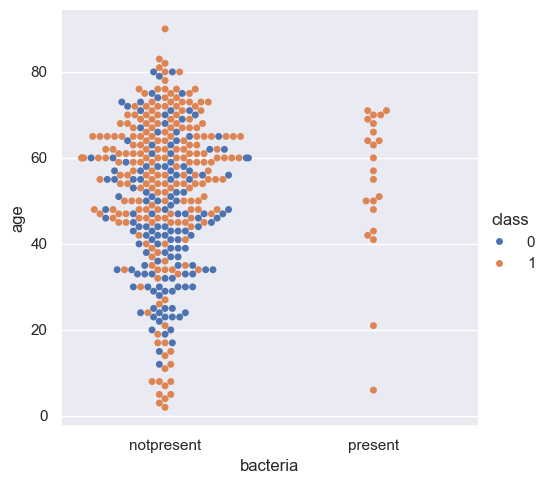

In [40]:
sns.catplot(data=df, x="bacteria", y="age", hue="class", kind="swarm")

In [41]:

grouped_by_class_and_diabetes= df.groupby(['class', 'diabetes_mellitus'])  


grouped_by_class_and_diabetes.describe()

age                                                \
                         count       mean        std   min   25%   50%   75%   
class diabetes_mellitus                                                        
0     no                 147.0  46.408163  15.708716  12.0  34.0  46.0  58.0   
1     no                 109.0  47.541284  19.951113   2.0  37.0  50.0  63.0   
      yes                133.0  60.278195  12.359730  14.0  54.0  61.0  68.0   

                              blood_pressure             ...  \
                          max          count       mean  ...   
class diabetes_mellitus                                  ...   
0     no                 80.0          146.0  71.438356  ...   
1     no                 83.0          106.0  78.113208  ...   
      yes                90.0          134.0  80.820896  ...   

                        white_blood_cell_count          red_blood_cell_count  \
                                           75%      max                count   
class diabetes_mellitus                                                        
0     no                                9200.0  11000.0                141.0   
1     no                               11050.0  19100.0                 42.0   
      yes                              10350.0  26400.0                 84.0   

                                                                         
                             mean       std  min  25%   50%    75%  max  
class diabetes_mellitus                                                  
0     no                 5.382270  0.599677  4.4  4.9  5.30  5.900  6.5  
1     no                 4.021429  1.068515  2.1  3.4  3.95  4.575  8.0  
      yes                3.907143  0.747814  2.1  3.4  3.90  4.400  6.0  

[3 rows x 112 columns]

In [42]:

grouped_by_hypertension_and_class = df.groupby(['hypertension', 'class'])  


grouped_by_hypertension_and_class.describe()

age                                                      \
                    count       mean        std   min   25%   50%   75%   max   
hypertension class                                                              
no           0      147.0  46.408163  15.708716  12.0  34.0  46.0  58.0  80.0   
             1      100.0  46.020000  20.687663   2.0  34.0  50.0  62.0  78.0   
yes          1      142.0  60.542254  11.338520  15.0  54.0  61.0  68.0  90.0   

                   blood_pressure             ... white_blood_cell_count  \
                            count       mean  ...                    75%   
hypertension class                            ...                          
no           0              146.0  71.438356  ...                 9200.0   
             1               95.0  77.052632  ...                11200.0   
yes          1              145.0  81.310345  ...                10275.0   

                            red_blood_cell_count                           \
                        max                count      mean       std  min   
hypertension class                                                          
no           0      11000.0                141.0  5.382270  0.599677  4.4   
             1      19100.0                 30.0  4.356667  0.719523  2.7   
yes          1      26400.0                 96.0  3.816667  0.870047  2.1   

                                          
                    25%  50%    75%  max  
hypertension class                        
no           0      4.9  5.3  5.900  6.5  
             1      3.9  4.3  4.775  6.0  
yes          1      3.3  3.8  4.300  8.0  

[3 rows x 112 columns]

### Analysis of Numerical variables

#### How blood_pressure is affected by hypertension?

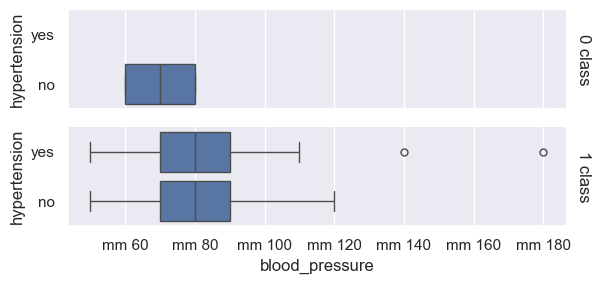

In [43]:
g = sns.catplot(
    data=df,
    x="blood_pressure", y="hypertension", row="class",
    kind="box", orient="h",
    sharex=True, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="blood_pressure", ylabel="hypertension")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('mm {x:.0f}')


For class=1 (CKD cases), 
   - for Hypertension = yes, Blood Pressure ranges from 70 to 90 and BP is on higher end. 
   - for Hypertension = no, Blood Pressure ranges from 70 to 90 but max reaches 120 is on higher end. 
   (boxplot is more towards right as compared to class 0)
   
For class=0 (NOTCKD cases), 
    - for Hypertension = yes, no data is available
    - for Hypertension = no, Blood Pressure ranges from 60 to 80 ,Blood Pressure on lower end .

#### How sodium and hypertension are related?

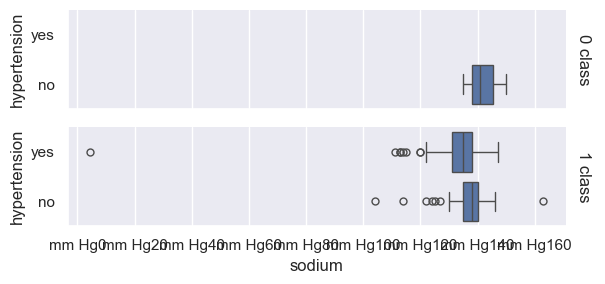

In [44]:
g = sns.catplot(
    data=df,
    x="sodium", y="hypertension", row="class",
    kind="box", orient="h",
    sharex=True, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="sodium", ylabel="hypertension")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('mm Hg{x:.0f}')


For class=1 (CKD cases), sodium is on slightly lower end but spread/variation is more. (boxplot is more towards left as compared to class 0)

For class=0 (NOTCKD cases), sodium is on slightly higher end.
For class=1 (CKD cases), 
   - for hypertension = yes, sodium ranges from 130 to 139 though min=122 and max=148. 
   - for hypertension = no, sodium ranges from 135 to 140 though min=135 and max=145. 
 
 sodium is little less than NOTCKD cases BUT the spread and range is MORE. (boxplot is towards left side as compared to class 0)


For class=0 (NOTCKD cases), 
  - for hypertension = yes, there is no data.
  - for hypertension = no, sodium ranges from 138 to 145 though min=135 to and max=150
hemoglobin is on higher end.(boxplot is towards right side as compared to class 1)

#### How potassium and hypertension are related?

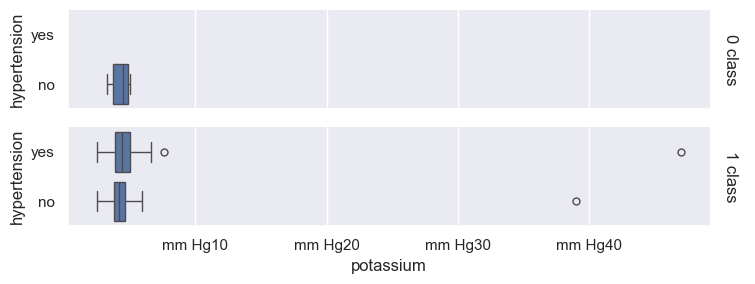

In [45]:
g = sns.catplot(
    data=df,
    x="potassium", y="hypertension", row="class",
    kind="box", orient="h",
    sharex=True, margin_titles=True,
    height=1.5, aspect=5,
)
g.set(xlabel="potassium", ylabel="hypertension")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('mm Hg{x:.0f}')


-Value of Potassium is almost same for both CKD and NOTCKD.

-Potassium is very very slightly on higher end. (boxplot is very very little right side as compared to class 0)

-Spread is more in case of CKD.



#### How hemoglobin affects anemia?


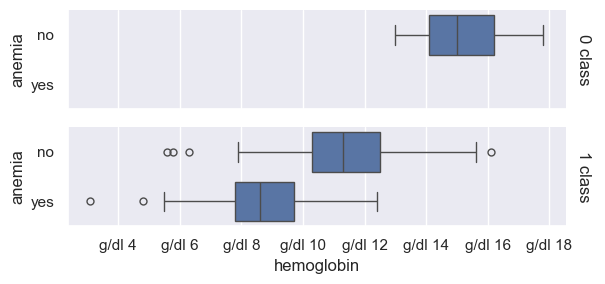

In [46]:
g = sns.catplot(
    data=df,
    x="hemoglobin", y="anemia", row="class",
    kind="box", orient="h",
    sharex=True, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="hemoglobin", ylabel="anemia")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('g/dl {x:.0f}')



For class=1 (CKD cases), 
   - for anemia = no, red_blood_cell_count ranges from 10.1 to 12.2. 
   - for anemia = yes, red_blood_cell_count ranges from 7.9 to 8.8. 
 
 hemoglobin is on lower end. (boxplot is towards left side as compared to class 0)


For class=0 (NOTCKD cases), 
  - for anemia = no, red_blood_cell_count ranges from 14 to 16.1.
  - for anemia = yes, there is no data. 
hemoglobin is on higher end.(boxplot is towards right side as compared to class 1)

#### How red_blood_cell_count and anemia are related?

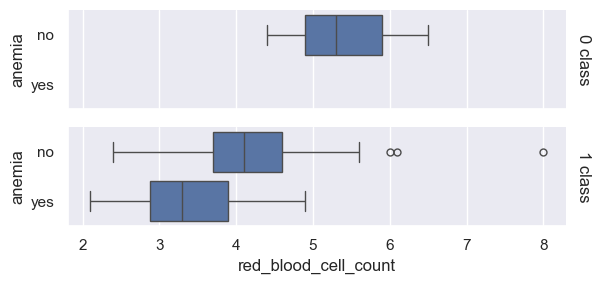

In [47]:
g = sns.catplot(
    data=df,
    x="red_blood_cell_count", y="anemia", row="class",
    kind="box", orient="h",
    sharex=True, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="red_blood_cell_count", ylabel="anemia")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('{x:.0f}')

For class=1 (CKD cases), 
   - for anemia = no, red_blood_cell_count ranges from 3.7 to 4.7. 
   - for anemia = yes, white_blood_cell_count ranges from 2.9 to 3.9. 
 
 red_blood_cell_count is on lower end. (boxplot is towards left side as compared to class 0)


For class=0 (NOTCKD cases), 
  - for anemia = no, blood_urea ranges from 4.9 to 5.9.
  - for anemia = yes, there is no data. 
red_blood_cell_count is on higher end.(boxplot is towards right side as compared to class 1)

#### How white_blood_cell_count and anemia are related?

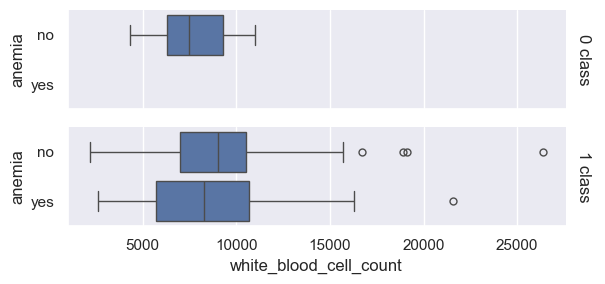

In [48]:
g = sns.catplot(
    data=df,
    x="white_blood_cell_count", y="anemia", row="class",
    kind="box", orient="h",
    sharex=True, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="white_blood_cell_count", ylabel="anemia")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('{x:.0f}')


For class=1 (CKD cases), 
   - for anemia = no, white_blood_cell_count ranges from 7000 to 11000. 
   - for anemia = yes, white_blood_cell_count ranges from 6000 to 11500. 
 
 white_blood_cell_count is on higher end and variation/ spread is more. (boxplot is little towards right as compared to class 0)


For class=0 (NOTCKD cases), 
  - for anemia = no, blood_urea ranges from 6000 to 9000.
  - for anemia = yes, there is no data. 
white_blood_cell_count is on lower end.

#### How blood_urea  and pedal_edema related to each other?

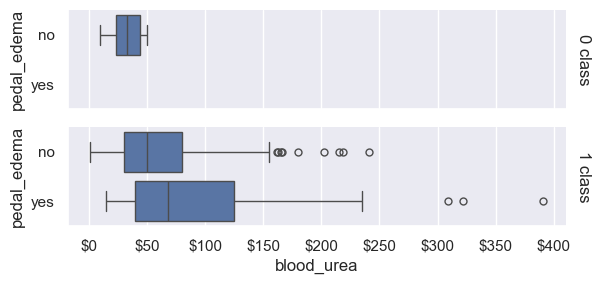

In [49]:
g = sns.catplot(
    data=df,
    x="blood_urea", y="pedal_edema", row="class",
    kind="box", orient="h",
    sharex=True, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="blood_urea", ylabel="pedal_edema")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')


For class=1 (CKD cases), 
   - for pedal_edema = no, blood_urea ranges from 30 to 65. 
   - for pedal_edema = yes, blood_urea ranges from 35 to 125. 
 
 blood_urea is on higher end and variation/ spread is more. (boxplot is little towards right as compared to class 0)


For class=0 (NOTCKD cases), 
  - for pedal_edema = no, blood_urea ranges from 25 to 40.
  - for pedal_edema = yes, there is no data. 
blood_urea is on lower end.

#### How serum_creatinine  and pedal_edema related to each other?

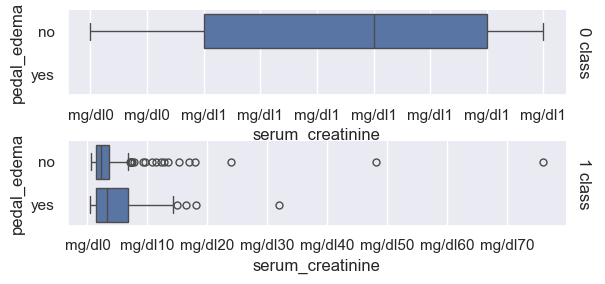

In [50]:
g = sns.catplot(
    data=df,
    x="serum_creatinine", y="pedal_edema", row="class",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="serum_creatinine", ylabel="pedal_edema")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('mg/dl{x:.0f}')

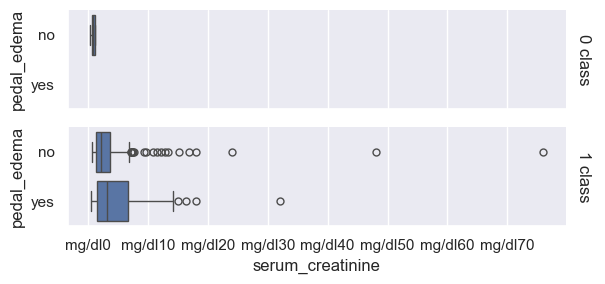

In [51]:
g = sns.catplot(
    data=df,
    x="serum_creatinine", y="pedal_edema", row="class",
    kind="box", orient="h",
    sharex=True, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="serum_creatinine", ylabel="pedal_edema")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('mg/dl{x:.0f}')


For class=1 (CKD cases), 
   - for pedal_edema = no, serum_creatinine ranges from 0 to 3. 
   - for pedal_edema = yes, serum_creatinine ranges from 0 to 8. 
 
 serum_creatinine is on higher end and variation/ spread is more. (boxplot is little towards right as compared to class 0)


For class=0 (NOTCKD cases), 
  - for pedal_edema = no, serum_creatinine ranges from 0 to 1.(as seen in previous graph )
  - for pedal_edema = yes, there is no data. 
serum_creatinine is negligible.

#### How sugar affects diabetes_mellitus?

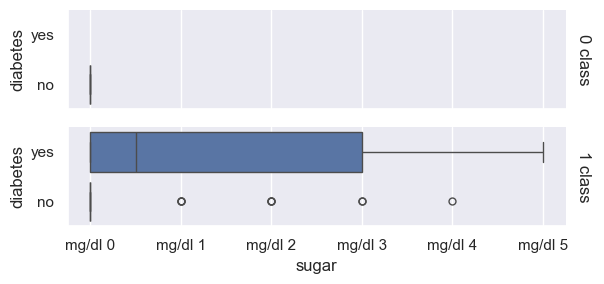

In [52]:
g = sns.catplot(
    data=df,
    x="sugar", y="diabetes_mellitus", row="class",
    kind="box", orient="h",
    sharex=True, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="sugar", ylabel="diabetes")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('mg/dl {x:.0f}')

For class=1 (CKD cases), 
   - for diabetes_mellitus = yes, sugar ranges from 0 to 3. 
   - for diabetes_mellitus = no, no data except for few outliers. 
   It is lesser than above.
   
   sugar is  on higher end and variation/ spread is more for CKD clases. (boxplot is bigger as compared to class 0)


For class=0 (NOTCKD cases), 
  - for diabetes_mellitus = yes, there are no rows of data.
  - for diabetes_mellitus = no, sugar remains around 0 only. 
sugar is on at lower end and no spread compared to CKD cases.

#### How blood_glucose_random affects diabetes_mellitus?

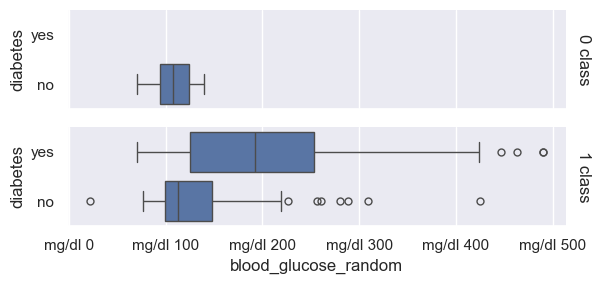

In [53]:
g = sns.catplot(
    data=df,
    x="blood_glucose_random", y="diabetes_mellitus", row="class",
    kind="box", orient="h",
    sharex=True, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="blood_glucose_random", ylabel="diabetes")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('mg/dl {x:.0f}')

For class=1 (CKD cases), 
   - for diabetes_mellitus = yes, blood_glucose_random ranges from 120 to 250. 
   - for diabetes_mellitus = no, blood_glucose_random ranges from 100 to 150. 
   It is lesser than above.
   
   blood_glucose_random is  on higher end and variation/ spread is more for CKD clases. (boxplot is little towards right as compared to class 0)


For class=0 (NOTCKD cases), 
  - for diabetes_mellitus = yes, there are no rows of data.
  - for diabetes_mellitus = no, blood_glucose_random ranges from 100 to 120. 
blood_glucose_random is on towards lower end and spread is also less as compared to CKD cases.

#### How albumin affects coronary_artery_disease?

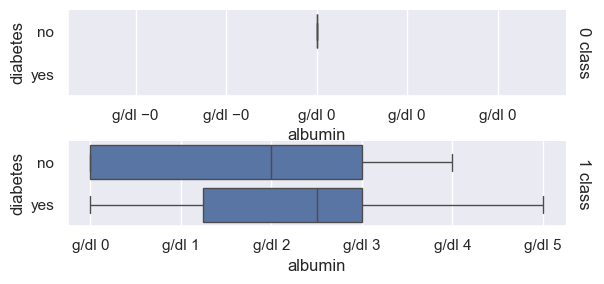

In [54]:
g = sns.catplot(
    data=df,
    x="albumin", y="coronary_artery_disease", row="class",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="albumin", ylabel="diabetes")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('g/dl {x:.0f}')

For class=1 (CKD cases),

    - for Coronory_artery_disease - no, albumin ranges from 0 to 3
    - for Coronory_artery_disease - yes, albumin ranges from 1.2 to 3(starts from higher value)

For class=0 (NOTCKD cases), 

    - for Coronory_artery_disease - no,  coount = negligible 
    - for Coronory_artery_disease - yes, count = 0
   

#### How age affects presence of bacteria? 

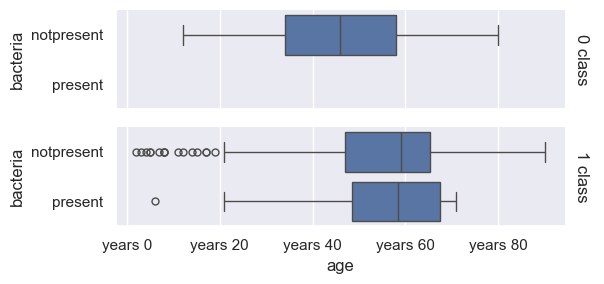

In [55]:
g = sns.catplot(
    data=df,
    x="age", y="bacteria", row="class",
    kind="box", orient="h",
    sharex=True, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="age", ylabel="bacteria")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('years {x:.0f}')

For class=1 (CKD cases),

    - for bacteria present - no, age ranges from 44 to 68
    - for bacteria present - yes, age ranges from 45 to 70
(age values are at higher end as compared to NOTCKD cases)

For class=0 (NOTCKD cases), 

    - for bacteria present - no,  age ranges from 35 to 58 (age values are at lower end as compared to CKD cases)
    - for Coronory_artery_disease - yes, no of rows - 0

In [56]:
df.info()
#df.groupby('class')['blood_pressure'].describe().unstack()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               348 no

### 1.Class and Hypertension (along with age)

In [57]:
group_ckd_hypertension = df.groupby(['class','hypertension'])['age']  

group_ckd_hypertension.count()

class  hypertension
0      no              147
1      no              100
       yes             142
Name: age, dtype: int64

1. Almost all the NOT_CKDs (145) have no hypertension.
2. Out of 242 CKDs, 100 have no hypertension nad 142 have Hypertension.

So hyeprtension leads to CKD

Now we want to explore which feature impacts presence or absence of hypertension in CKD cases. Age feature to be explored futher.

In [58]:
class_hypertension_df1 = df.groupby(['class','hypertension'])['age'].aggregate('count')
class_hypertension_df1


class  hypertension
0      no              147
1      no              100
       yes             142
Name: age, dtype: int64

In [59]:
class_hypertension_df1.index

MultiIndex([(0,  'no'),
            (1,  'no'),
            (1, 'yes')],
           names=['class', 'hypertension'])

In [60]:
class_hypertension_df2 = df.groupby(['class','hypertension'])['age'].aggregate('count').unstack()
class_hypertension_df2

hypertension     no    yes
class                     
0             147.0    NaN
1             100.0  142.0

In [61]:
class_hypertension_df3 = df.groupby(['class','hypertension'])['age'].aggregate('mean').unstack()
class_hypertension_df3

hypertension         no        yes
class                             
0             46.408163        NaN
1             46.020000  60.542254

<Axes: xlabel='class'>

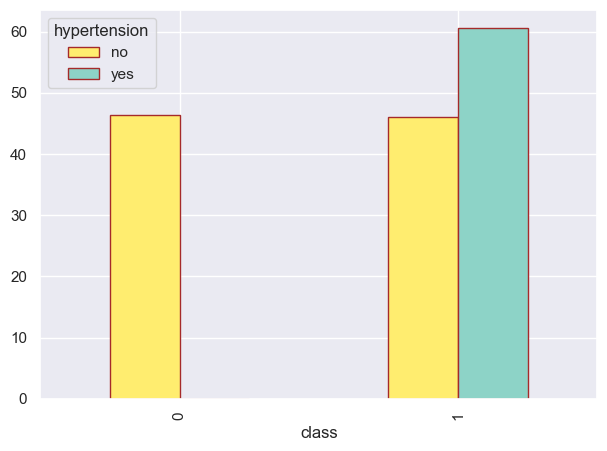

In [62]:
class_hypertension_df3.plot(kind='bar', colormap = plt.cm.Set3_r,edgecolor='brown')


#### Observations
1. In NOT_CKD cases, hypertension is no and  mean age is 46
2. In CKD cases, 
hypertension is **no** when  **mean age** is 46
hypertension is **yes** when  **mean age** is 60

diabetes_mellitus### 2.Class and diabetes_mellitus (along with age)

In [63]:
group_ckd_diabetes = df.groupby(['class','diabetes_mellitus'])['age']  

group_ckd_diabetes.count()


class  diabetes_mellitus
0      no                   147
1      no                   109
       yes                  133
Name: age, dtype: int64

1. Almost all the NOT_CKDs (147) have no diabetes_mellitus.
2. Out of 242 CKDs, 109 have no diabetes_mellitus and 133 have diabetes_mellitus.

So diabetes_mellitus leads to CKD. 

Now we want to explore which feature impacts presence or absence of diabetes_mellitus in CKD cases. Age feature to be explored futher and Blood sugarlevels.

In [64]:
class_diabetes_df3 = df.groupby(['class','diabetes_mellitus'])['age'].aggregate('mean').unstack()
class_diabetes_df3

diabetes_mellitus         no        yes
class                                  
0                  46.408163        NaN
1                  47.541284  60.278195

<Axes: xlabel='class'>

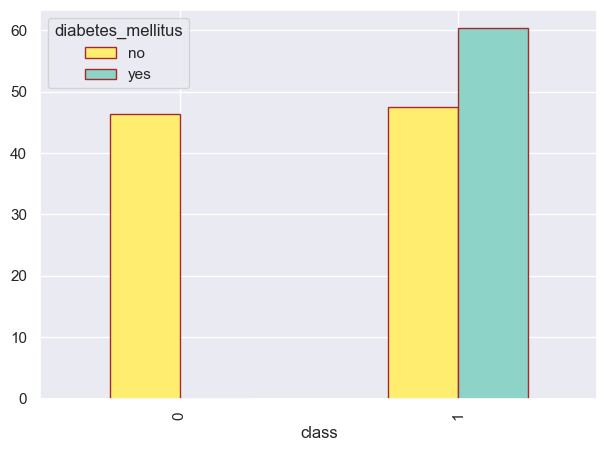

In [65]:
class_diabetes_df3.plot(kind='bar', colormap = plt.cm.Set3_r,edgecolor='brown')


#### Observations
1. In NOT_CKD cases, diabetes_mellitus is no and  mean age is 46
2. In CKD cases, 
diabetes_mellitus is **no** when  **mean age** is 47
diabetes_mellitus is **yes** when  **mean age** is 60

### 3.Class and coronary_artery_disease (along with age)

In [66]:
group_ckd_coronory = df.groupby(['class','coronary_artery_disease'])['age']  

group_ckd_coronory.count()

class  coronary_artery_disease
0      no                         147
1      no                         208
       yes                         34
Name: age, dtype: int64

1. Almost all the NOT_CKDs (147) have no coronary_artery_disease.
2. Out of 242 CKDs, 208 have no coronary_artery_disease and few 34 have coronary_artery_disease.

So coronary_artery_disease may be present in CKD cases. 

Now we want to explore which feature impacts presence or absence of coronary_artery_disease in CKD cases. Age feature to be explored futher and Blood pressure , sodium,pottasium.

In [67]:
class_coronary_df3 = df.groupby(['class','coronary_artery_disease'])['age'].aggregate('mean').unstack()
class_coronary_df3

coronary_artery_disease         no        yes
class                                        
0                        46.408163        NaN
1                        52.923077  64.441176

Observations
1. In NOT_CKD cases, coronary_artery_disease is no and  mean age is 46.4
2. In CKD cases, 
coronary_artery_disease is **no** when  **mean age** is 52.92
coronary_artery_disease is **yes** when  **mean age** is 64.44


<Axes: xlabel='class'>

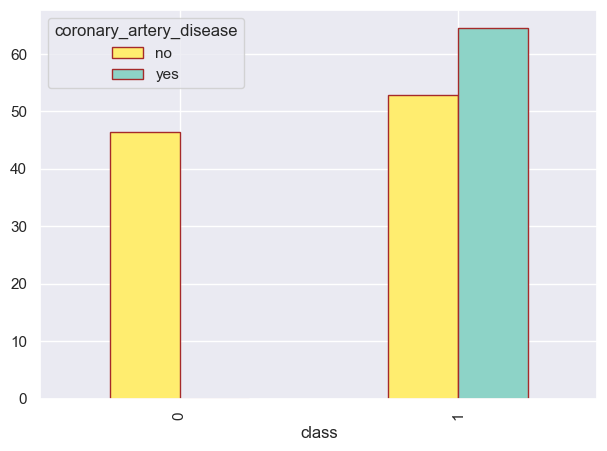

In [68]:
class_coronary_df3.plot(kind='bar', colormap = plt.cm.Set3_r,edgecolor='brown')

#### Observations
1. In NOT_CKD cases, coronary_artery_disease is no and  mean age is 46
2. In CKD cases, 
coronary_artery_disease is **no** when  **mean age** is 52
coronary_artery_disease is **yes** when  **mean age** is 64

### 4.Class and appetite (along with age)

In [69]:
group_ckd_appetite = df.groupby(['class','appetite'])['age']  

group_ckd_appetite.count()

class  appetite
0      good        148
1      good        161
       poor         81
Name: age, dtype: int64

1. Almost all the NOT_CKDs (147) have good appetite.
2. Out of 242 CKDs, 161 have good appetite and 81 have poor appetite.

So poor appetite means CKD. 

Now we want to explore age and blood glucose or sugar levels in good and poor appettite CKD cases. 

In [70]:
class_appetite_df3 = df.groupby(['class','appetite'])['age'].aggregate('mean').unstack()
class_appetite_df3

appetite       good       poor
class                         
0         46.324324        NaN
1         53.397516  56.814815

<Axes: xlabel='class'>

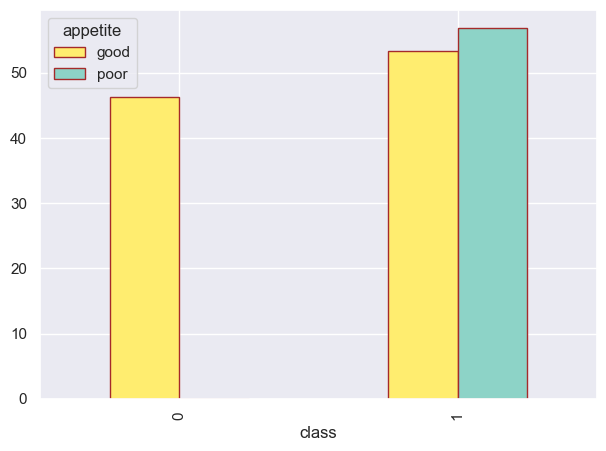

In [71]:
class_appetite_df3.plot(kind='bar', colormap = plt.cm.Set3_r,edgecolor='brown')

#### Observations
1. In NOT_CKD cases, appetite is good and  mean age is 46
2. In CKD cases, 
appetite is **good** when  **mean age** is 53
appetite is **poor** when  **mean age** is 56

#### 5.Class and pedal_edema (along with age)

In [72]:
group_ckd_pedal_edema = df.groupby(['class','pedal_edema'])['age']  

group_ckd_pedal_edema.count()

class  pedal_edema
0      no             148
1      no             168
       yes             74
Name: age, dtype: int64

1. Almost all the NOT_CKDs (148) have no pedal_edema.
2. Out of 242 CKDs, 168 have no pedal_edema and 74 have pedal_edema.
Which feature leads to pedal edema in CKD cases. Age needs to be checked.
May be blood pressure and blood sugar levels to be checked.


In [73]:
class_pedal_edema_df3 = df.groupby(['class','pedal_edema'])['age'].aggregate('mean').unstack()
class_pedal_edema_df3

pedal_edema         no        yes
class                            
0            46.324324        NaN
1            54.392857  54.878378

<Axes: xlabel='class'>

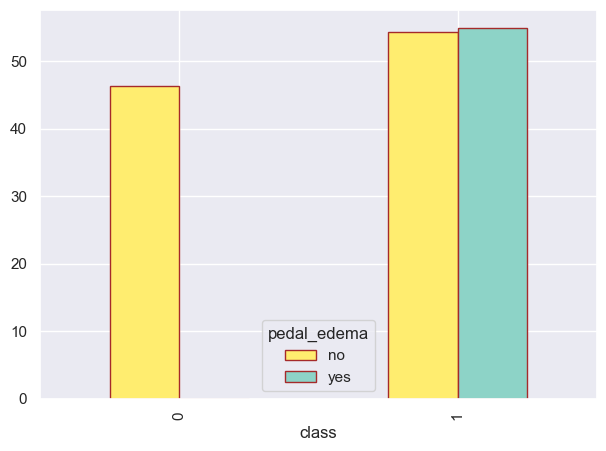

In [74]:
class_pedal_edema_df3.plot(kind='bar', colormap = plt.cm.Set3_r,edgecolor='brown')

#### Observations
1. In NOT_CKD cases, pedal_edema is no and  mean age is 46.3
2. In CKD cases, 
pedal_edema is **no** when  **mean age** is 54.3
pedal_edema is **yes** when  **mean age** is 54.8

In [75]:
group_ckd_anemia = df.groupby(['class','anemia'])['age']  

group_ckd_anemia.count()

class  anemia
0      no        148
1      no        185
       yes        57
Name: age, dtype: int64

1. Almost all the NOT_CKDs (148) have no anemia.
2. Out of 242 CKDs, 185 have no anemia and 57 have anemia.
Which feature leads to anemia in CKD cases. May be blood pressure and blood sugar levels to be checked.

In [76]:
class_anemia_df3 = df.groupby(['class','anemia'])['age'].aggregate('mean').unstack()
class_anemia_df3

anemia         no        yes
class                       
0       46.324324        NaN
1       54.821622  53.631579

#### Observations
1. In NOT_CKD cases, anemia is no and  mean age is 46.3
2. In CKD cases, 
anemia is **no** when  **mean age** is 54.8
anemia is **yes** when  **mean age** is 53.6

<Axes: xlabel='class'>

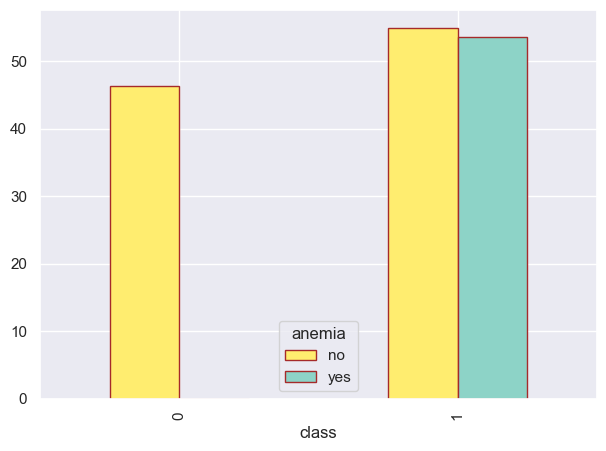

In [77]:
class_anemia_df3.plot(kind='bar', colormap = plt.cm.Set3_r,edgecolor='brown')

In [78]:
group_ckd_rbcs = df.groupby(['class','red_blood_cells'])['age']  

group_ckd_rbcs.count()

class  red_blood_cells
0      normal             141
1      abnormal            44
       normal              59
Name: age, dtype: int64

In [79]:
class_rbcs_df3 = df.groupby(['class','red_blood_cells'])['age'].aggregate('mean').unstack()
class_rbcs_df3

red_blood_cells   abnormal     normal
class                                
0                      NaN  46.056738
1                52.068182  54.610169

<Axes: xlabel='class'>

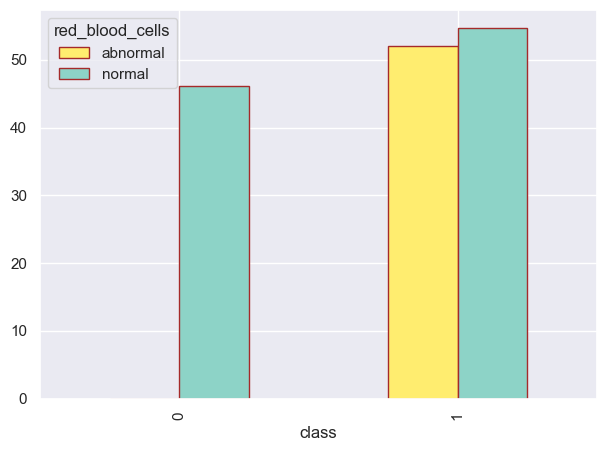

In [80]:
class_rbcs_df3.plot(kind='bar', colormap = plt.cm.Set3_r,edgecolor='brown')

In [81]:
group_ckd_pus_cell = df.groupby(['class','pus_cell'])['age']  

group_ckd_pus_cell.count()

class  pus_cell
0      normal      141
1      abnormal     74
       normal      115
Name: age, dtype: int64

In [82]:
class_pus_cell_df3 = df.groupby(['class','pus_cell'])['age'].aggregate('mean').unstack()
class_pus_cell_df3

pus_cell   abnormal     normal
class                         
0               NaN  46.056738
1         55.148649  52.373913

<Axes: xlabel='class'>

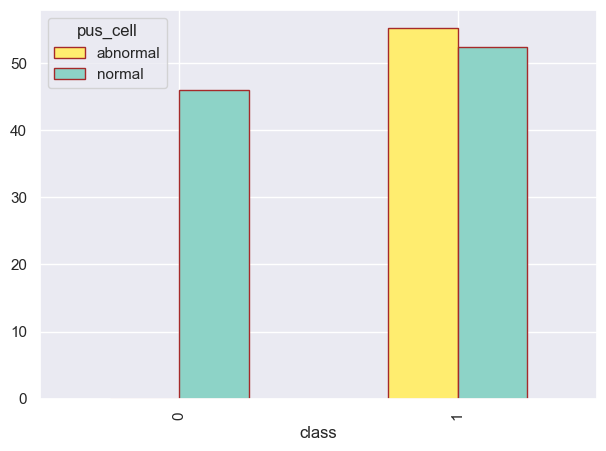

In [83]:

class_pus_cell_df3.plot(kind='bar', colormap = plt.cm.Set3_r,edgecolor='brown')

In [84]:
group_ckd_pus_cell_clumps = df.groupby(['class','pus_cell_clumps'])['age']  

group_ckd_pus_cell_clumps.count()


class  pus_cell_clumps
0      notpresent         145
1      notpresent         200
       present             42
Name: age, dtype: int64

In [85]:
class_pus_cell_clumps_df3 = df.groupby(['class','pus_cell_clumps'])['age'].aggregate('mean').unstack()
class_pus_cell_clumps_df3

pus_cell_clumps  notpresent    present
class                                 
0                 46.682759        NaN
1                 53.530000  59.357143

<Axes: xlabel='class'>

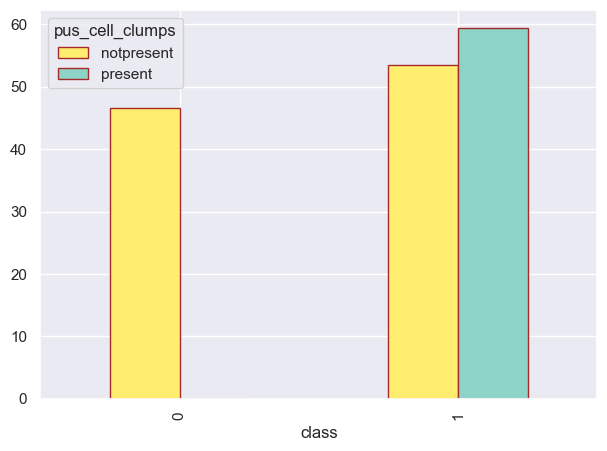

In [86]:
class_pus_cell_clumps_df3.plot(kind='bar', colormap = plt.cm.Set3_r,edgecolor='brown')

In [87]:
group_ckd_bacteria = df.groupby(['class','bacteria'])['age']  

group_ckd_bacteria.count()

class  bacteria  
0      notpresent    145
1      notpresent    220
       present        22
Name: age, dtype: int64

In [88]:
class_bacteria_df3 = df.groupby(['class','bacteria'])['age'].aggregate('mean').unstack()
class_bacteria_df3

bacteria  notpresent    present
class                          
0          46.682759        NaN
1          54.540909  54.545455

In [89]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               348 no

### Analysis of Numerical variables

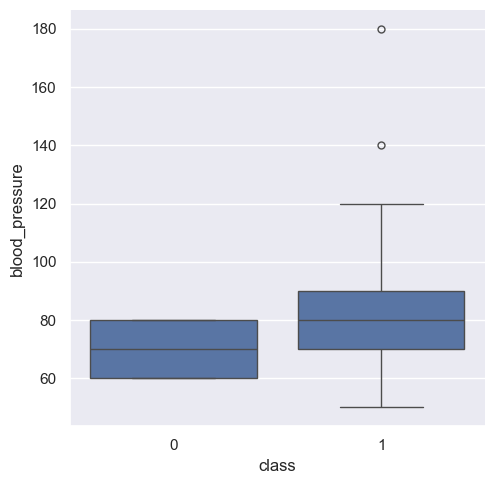

In [90]:
sns.catplot(data=df, x="class", y="blood_pressure", kind="box")

Blood_Pressure is at higher for CKd=1 cases

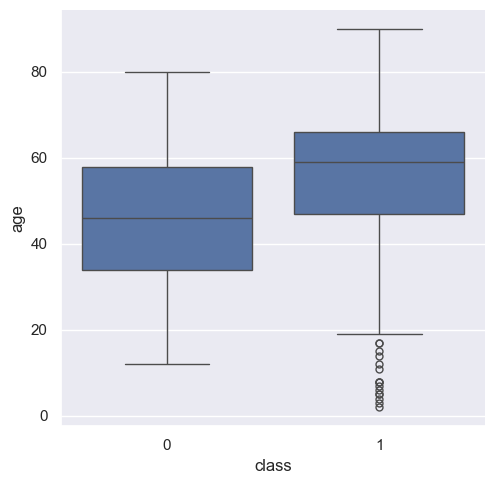

In [91]:
sns.catplot(data=df, x="class", y="age", kind="box")

Blood_Pressure is at higher for CKd=1 cases though outliers exist for lower age values also

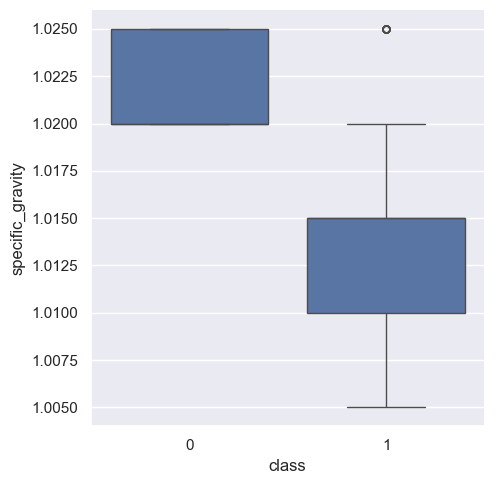

In [92]:
sns.catplot(data=df, x="class", y="specific_gravity", kind="box")

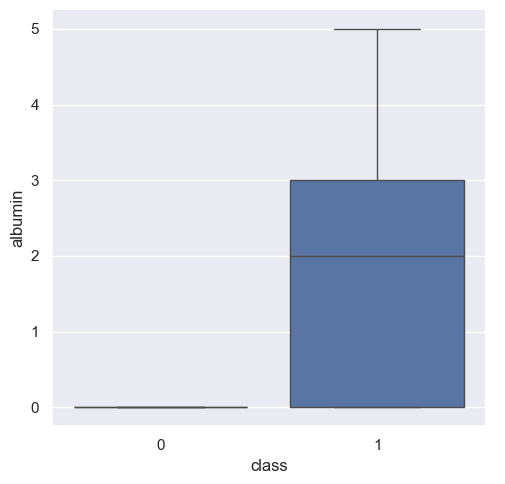

In [93]:
sns.catplot(data=df, x="class", y="albumin", kind="box")

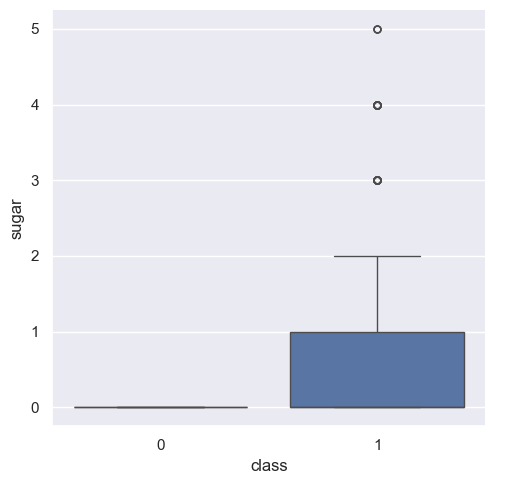

In [94]:
sns.catplot(data=df, x="class", y="sugar", kind="box")

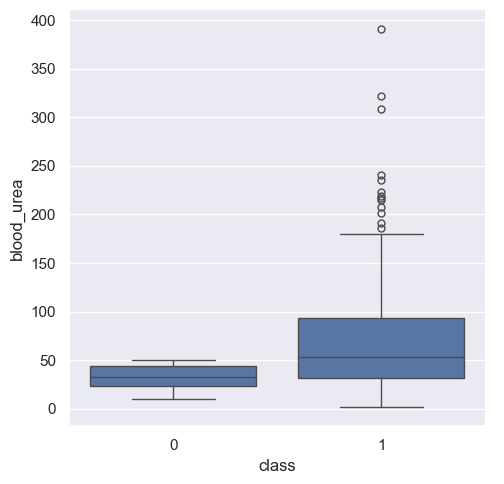

In [95]:
sns.catplot(data=df, x="class", y="blood_urea", kind="box")

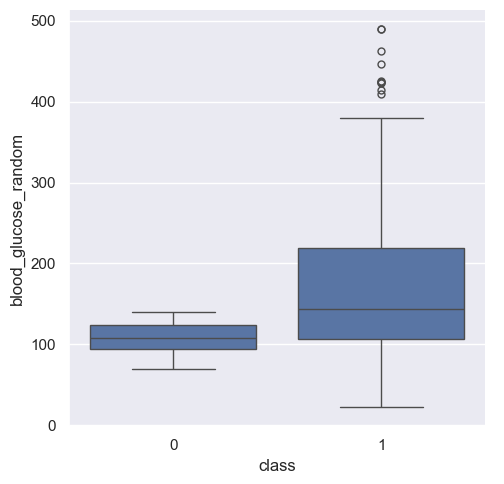

In [96]:
sns.catplot(data=df, x="class", y="blood_glucose_random", kind="box")

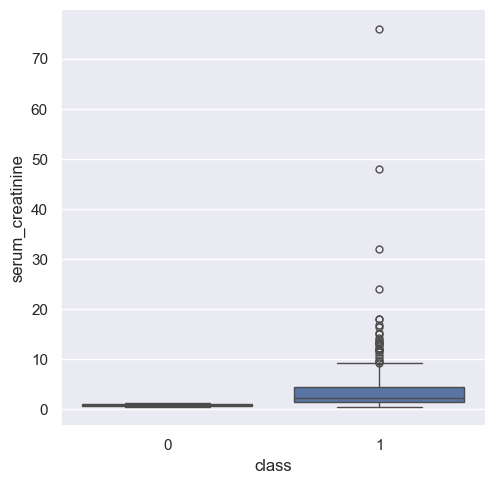

In [97]:
  
sns.catplot(data=df, x="class", y="serum_creatinine", kind="box")

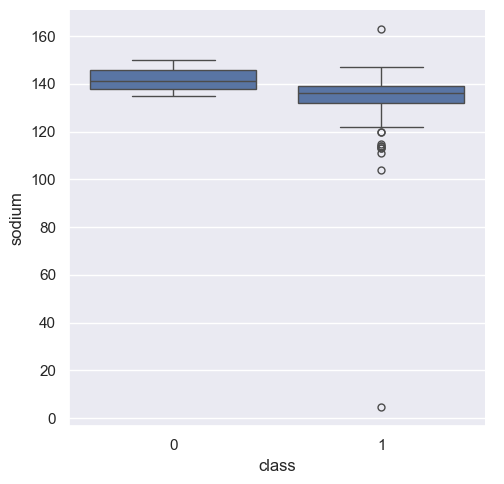

In [98]:
sns.catplot(data=df, x="class", y="sodium", kind="box")

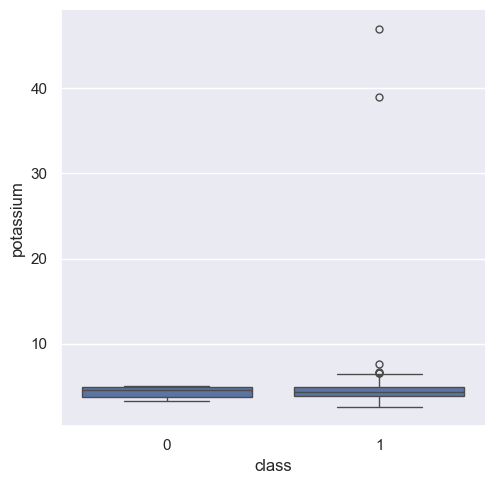

In [99]:
sns.catplot(data=df, x="class", y="potassium", kind="box")

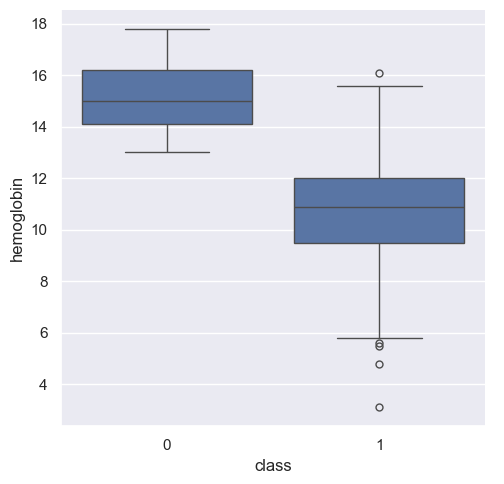

In [100]:
sns.catplot(data=df, x="class", y="hemoglobin", kind="box")

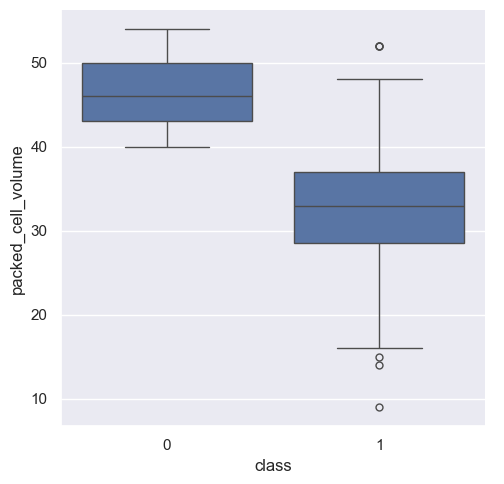

In [101]:
sns.catplot(data=df, x="class", y="packed_cell_volume", kind="box")

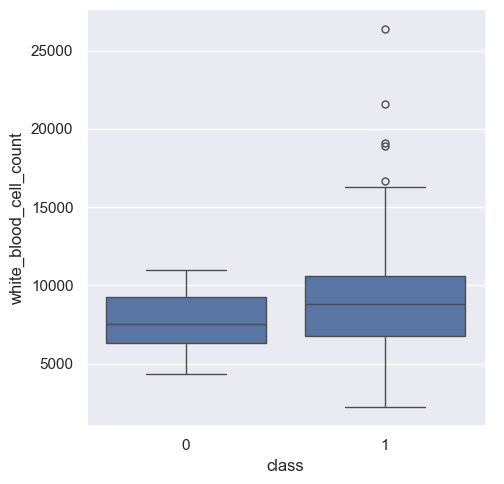

In [102]:
sns.catplot(data=df, x="class", y="white_blood_cell_count", kind="box")

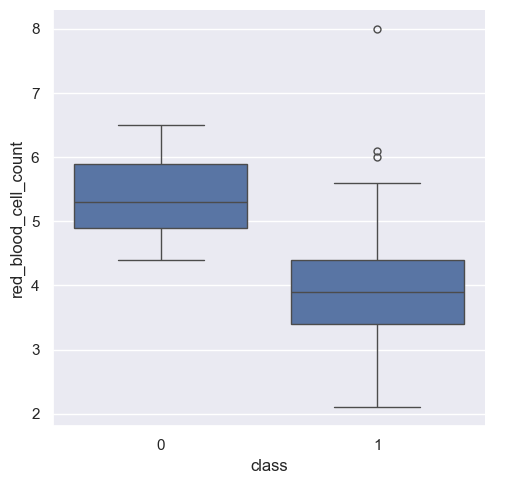

In [103]:
sns.catplot(data=df, x="class", y="red_blood_cell_count", kind="box")

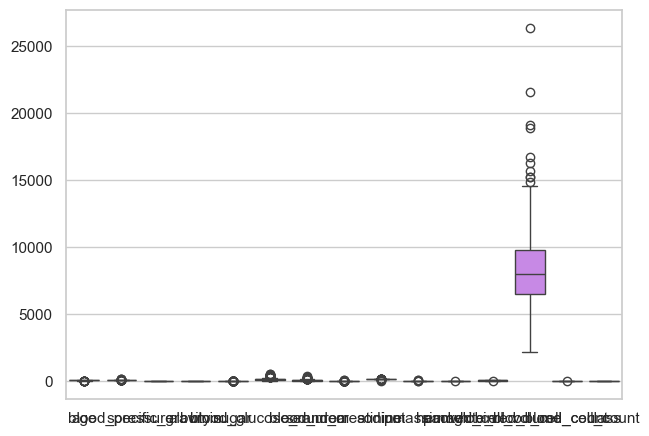

In [104]:
sns.set_style("whitegrid")
#data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=df);

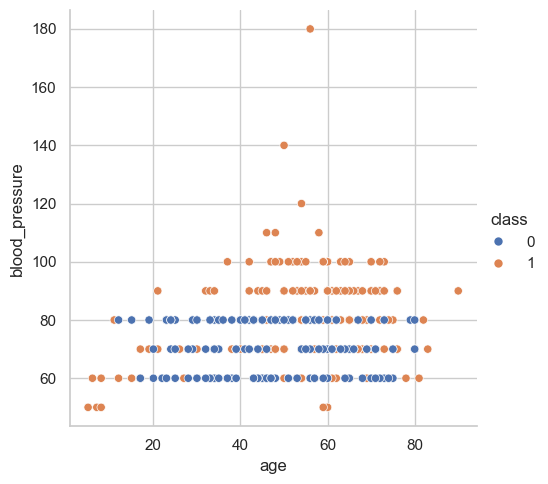

In [105]:
sns.relplot(
    data=df,
    x="age", y="blood_pressure", hue="class"
)

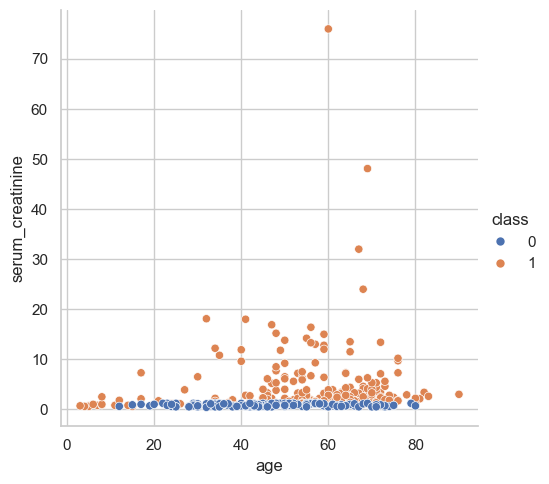

In [106]:
sns.relplot(
    data=df,
    x="age", y="serum_creatinine", hue="class"
)

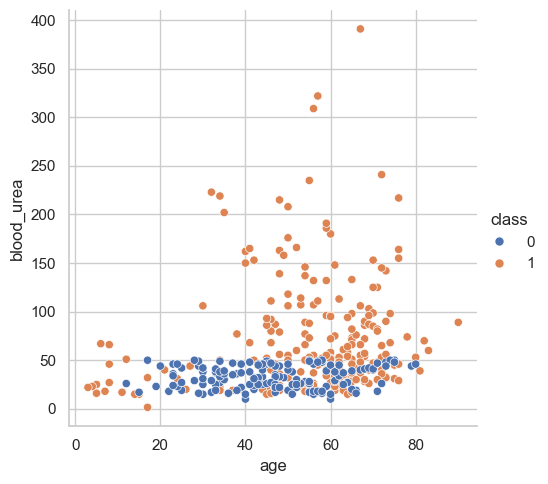

In [107]:
sns.relplot(
    data=df,
    x="age", y="blood_urea", hue="class"
)

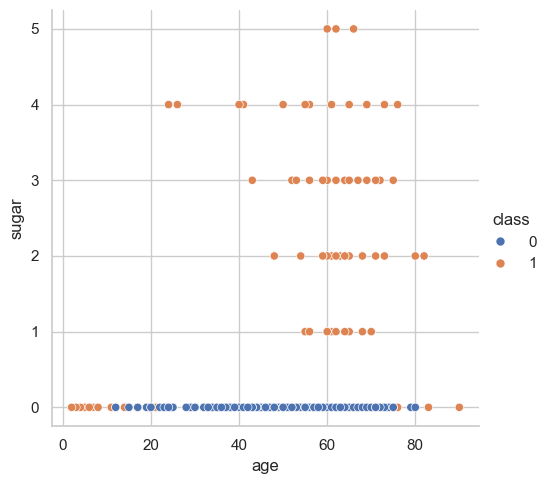

In [108]:
sns.relplot(
    data=df,
    x="age", y="sugar", hue="class"
)

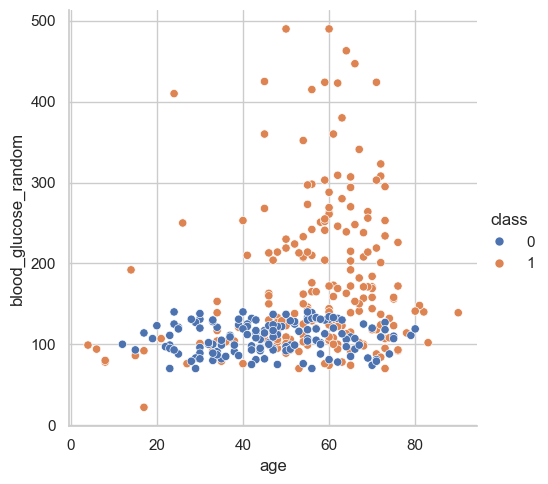

In [109]:
sns.relplot(
    data=df,
    x="age", y="blood_glucose_random", hue="class"
)

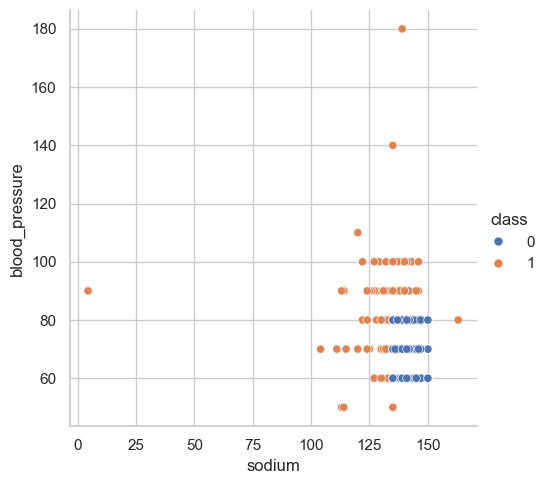

In [110]:
sns.relplot(
    data=df,
    x="sodium", y="blood_pressure", hue="class"
)

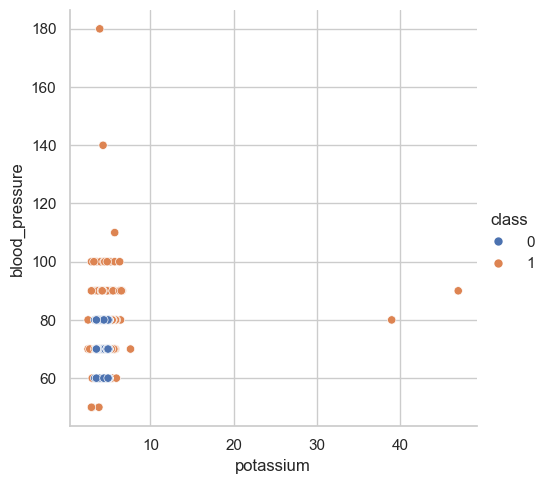

In [111]:
sns.relplot(
    data=df,
    x="potassium", y="blood_pressure", hue="class" 
)

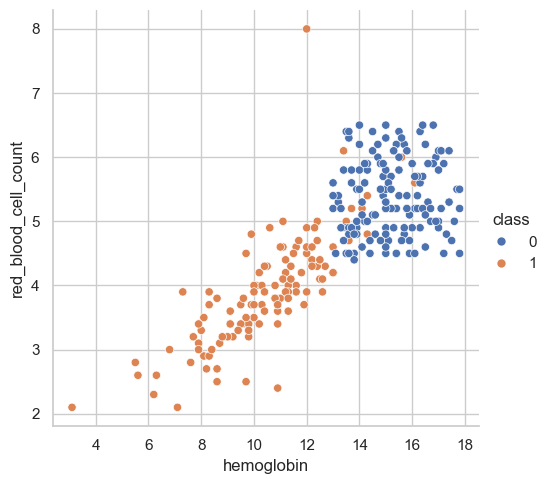

In [112]:
sns.relplot(
    data=df,
    x="hemoglobin", y="red_blood_cell_count", hue="class" 
)

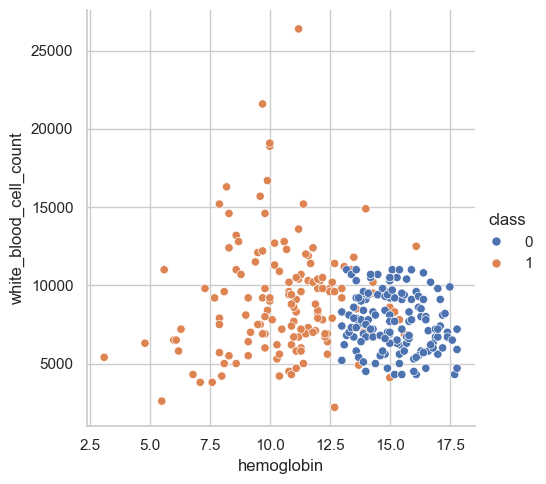

In [113]:
sns.relplot(
    data=df,
    x="hemoglobin", y="white_blood_cell_count", hue="class" 
)

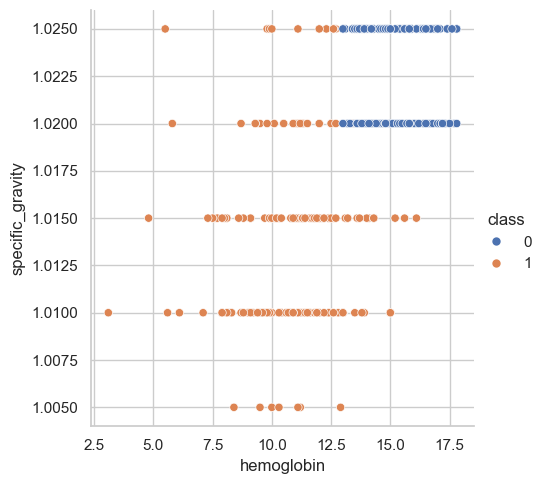

In [114]:
sns.relplot(
    data=df,
    x="hemoglobin", y="specific_gravity", hue="class" 
)

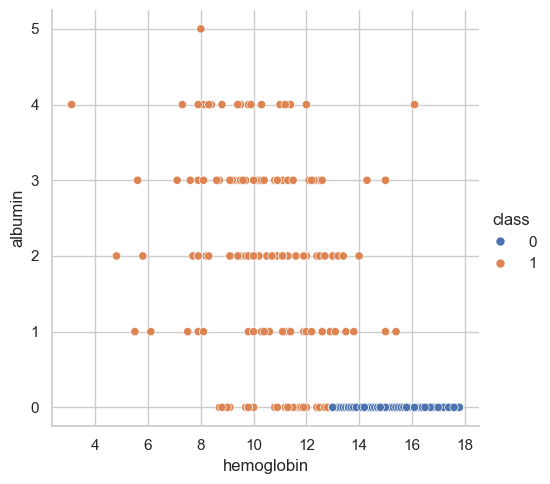

In [115]:
sns.relplot(
    data=df,
    x="hemoglobin", y="albumin", hue="class" 
)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               348 no

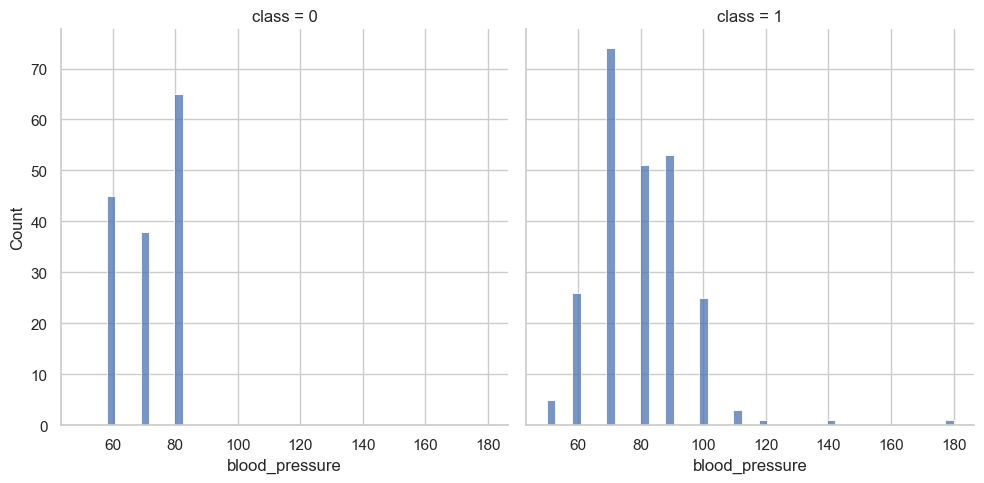

In [117]:
sns.displot(df, x="blood_pressure", col="class")


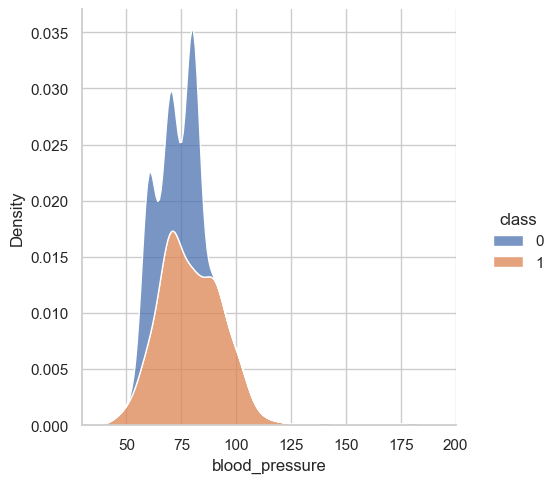

In [118]:
sns.displot(df, x="blood_pressure", hue="class", kind="kde", multiple="stack",fill=True)

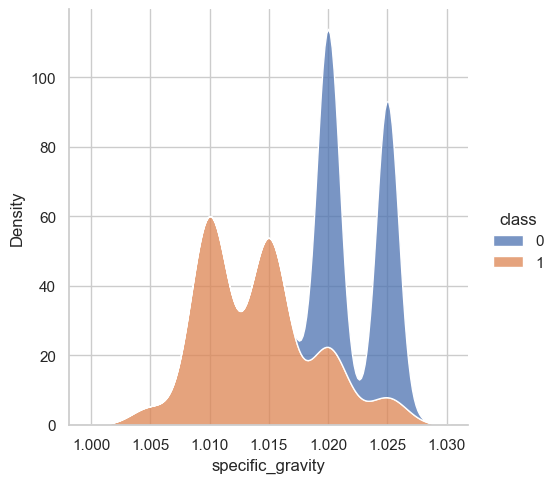

In [119]:
sns.displot(df, x="specific_gravity", hue="class", kind="kde", multiple="stack")

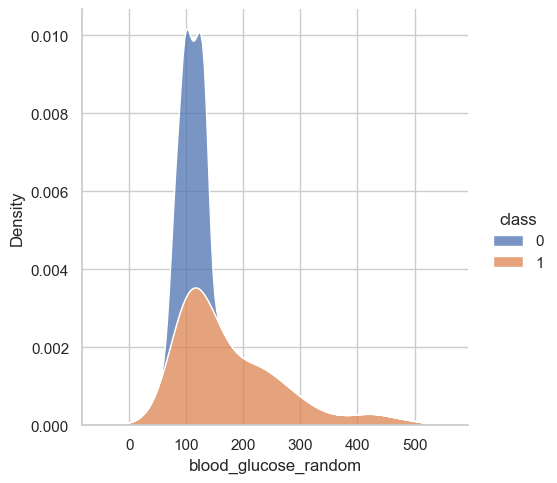

In [120]:
sns.displot(df, x="blood_glucose_random", hue="class", kind="kde", multiple="stack")

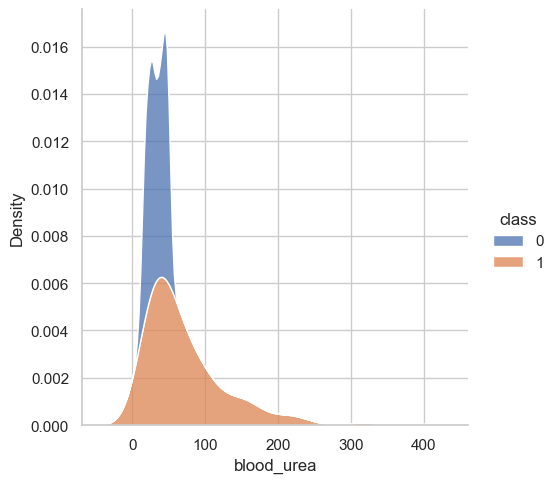

In [121]:
sns.displot(df, x="blood_urea", hue="class", kind="kde", multiple="stack")

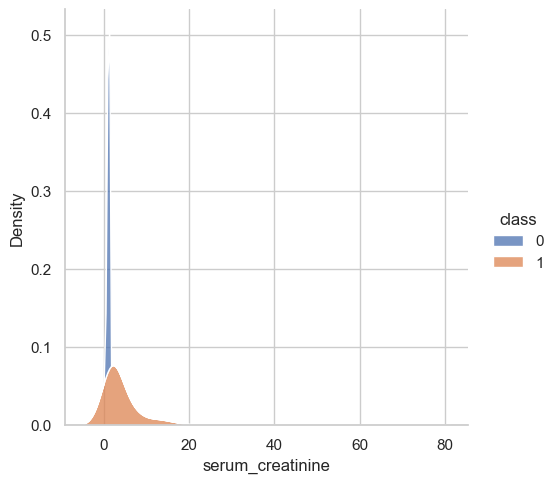

In [122]:
sns.displot(df, x="serum_creatinine", hue="class", kind="kde", multiple="stack")

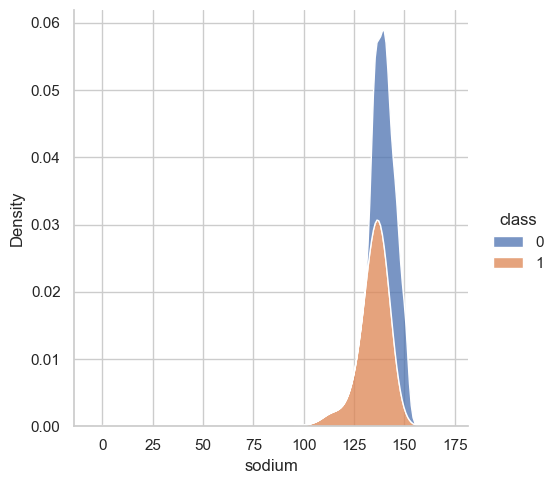

In [123]:
sns.displot(df, x="sodium", hue="class", kind="kde", multiple="stack")

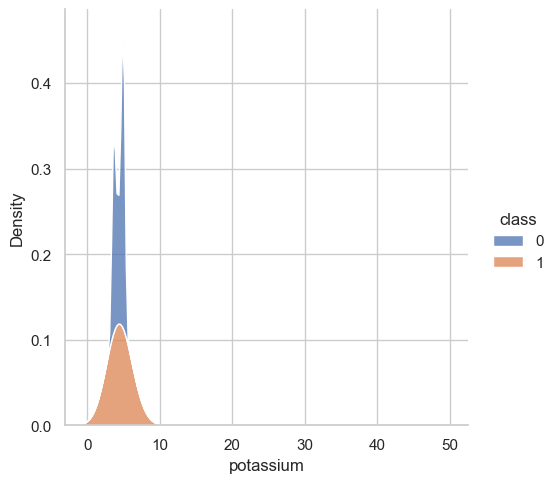

In [124]:
sns.displot(df, x="potassium", hue="class", kind="kde", multiple="stack")

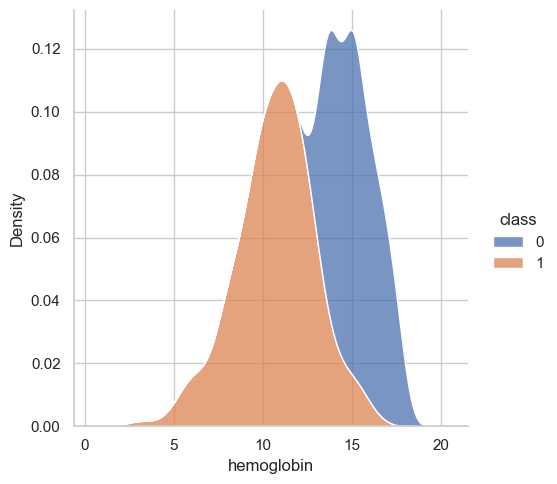

In [125]:
sns.displot(df, x="hemoglobin", hue="class", kind="kde", multiple="stack")

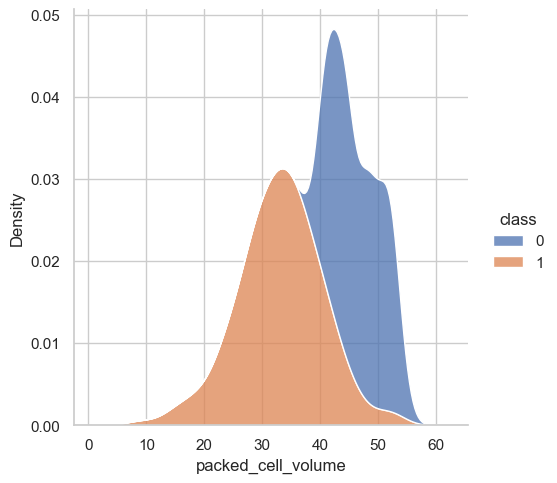

In [126]:
sns.displot(df, x="packed_cell_volume", hue="class", kind="kde", multiple="stack")

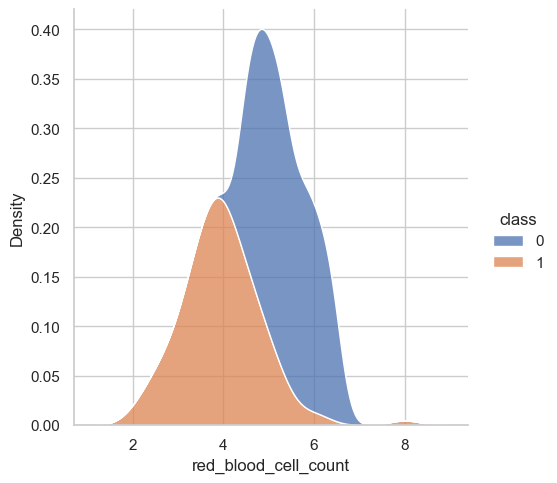

In [127]:
sns.displot(df, x="red_blood_cell_count", hue="class", kind="kde", multiple="stack")

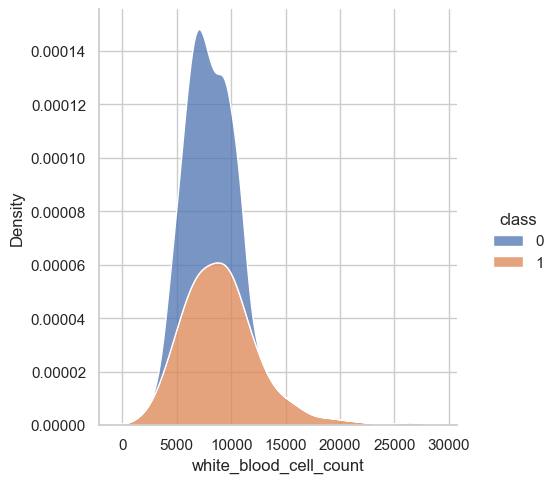

In [128]:
sns.displot(df, x="white_blood_cell_count", hue="class", kind="kde", multiple="stack")

### Bivariate analysis

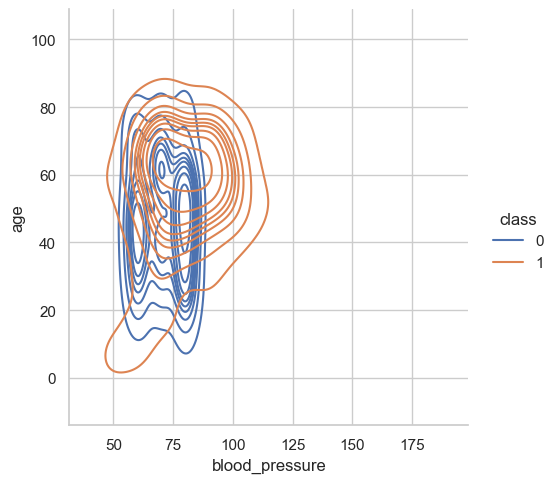

In [129]:
sns.displot(df, x="blood_pressure", y="age", hue="class", kind="kde")

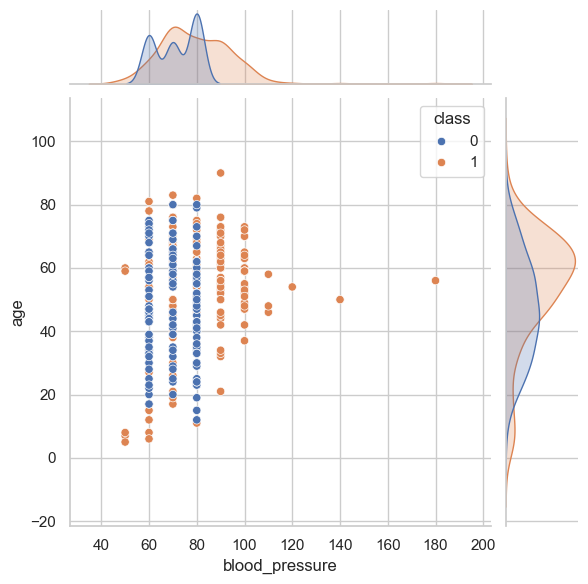

In [130]:
sns.jointplot(
    data=df,
    x="blood_pressure", y="age", hue="class"
)

In [131]:
# Plot the data with Matplotlib defaults
#sns.pairplot(df, hue='class', size=2.5);

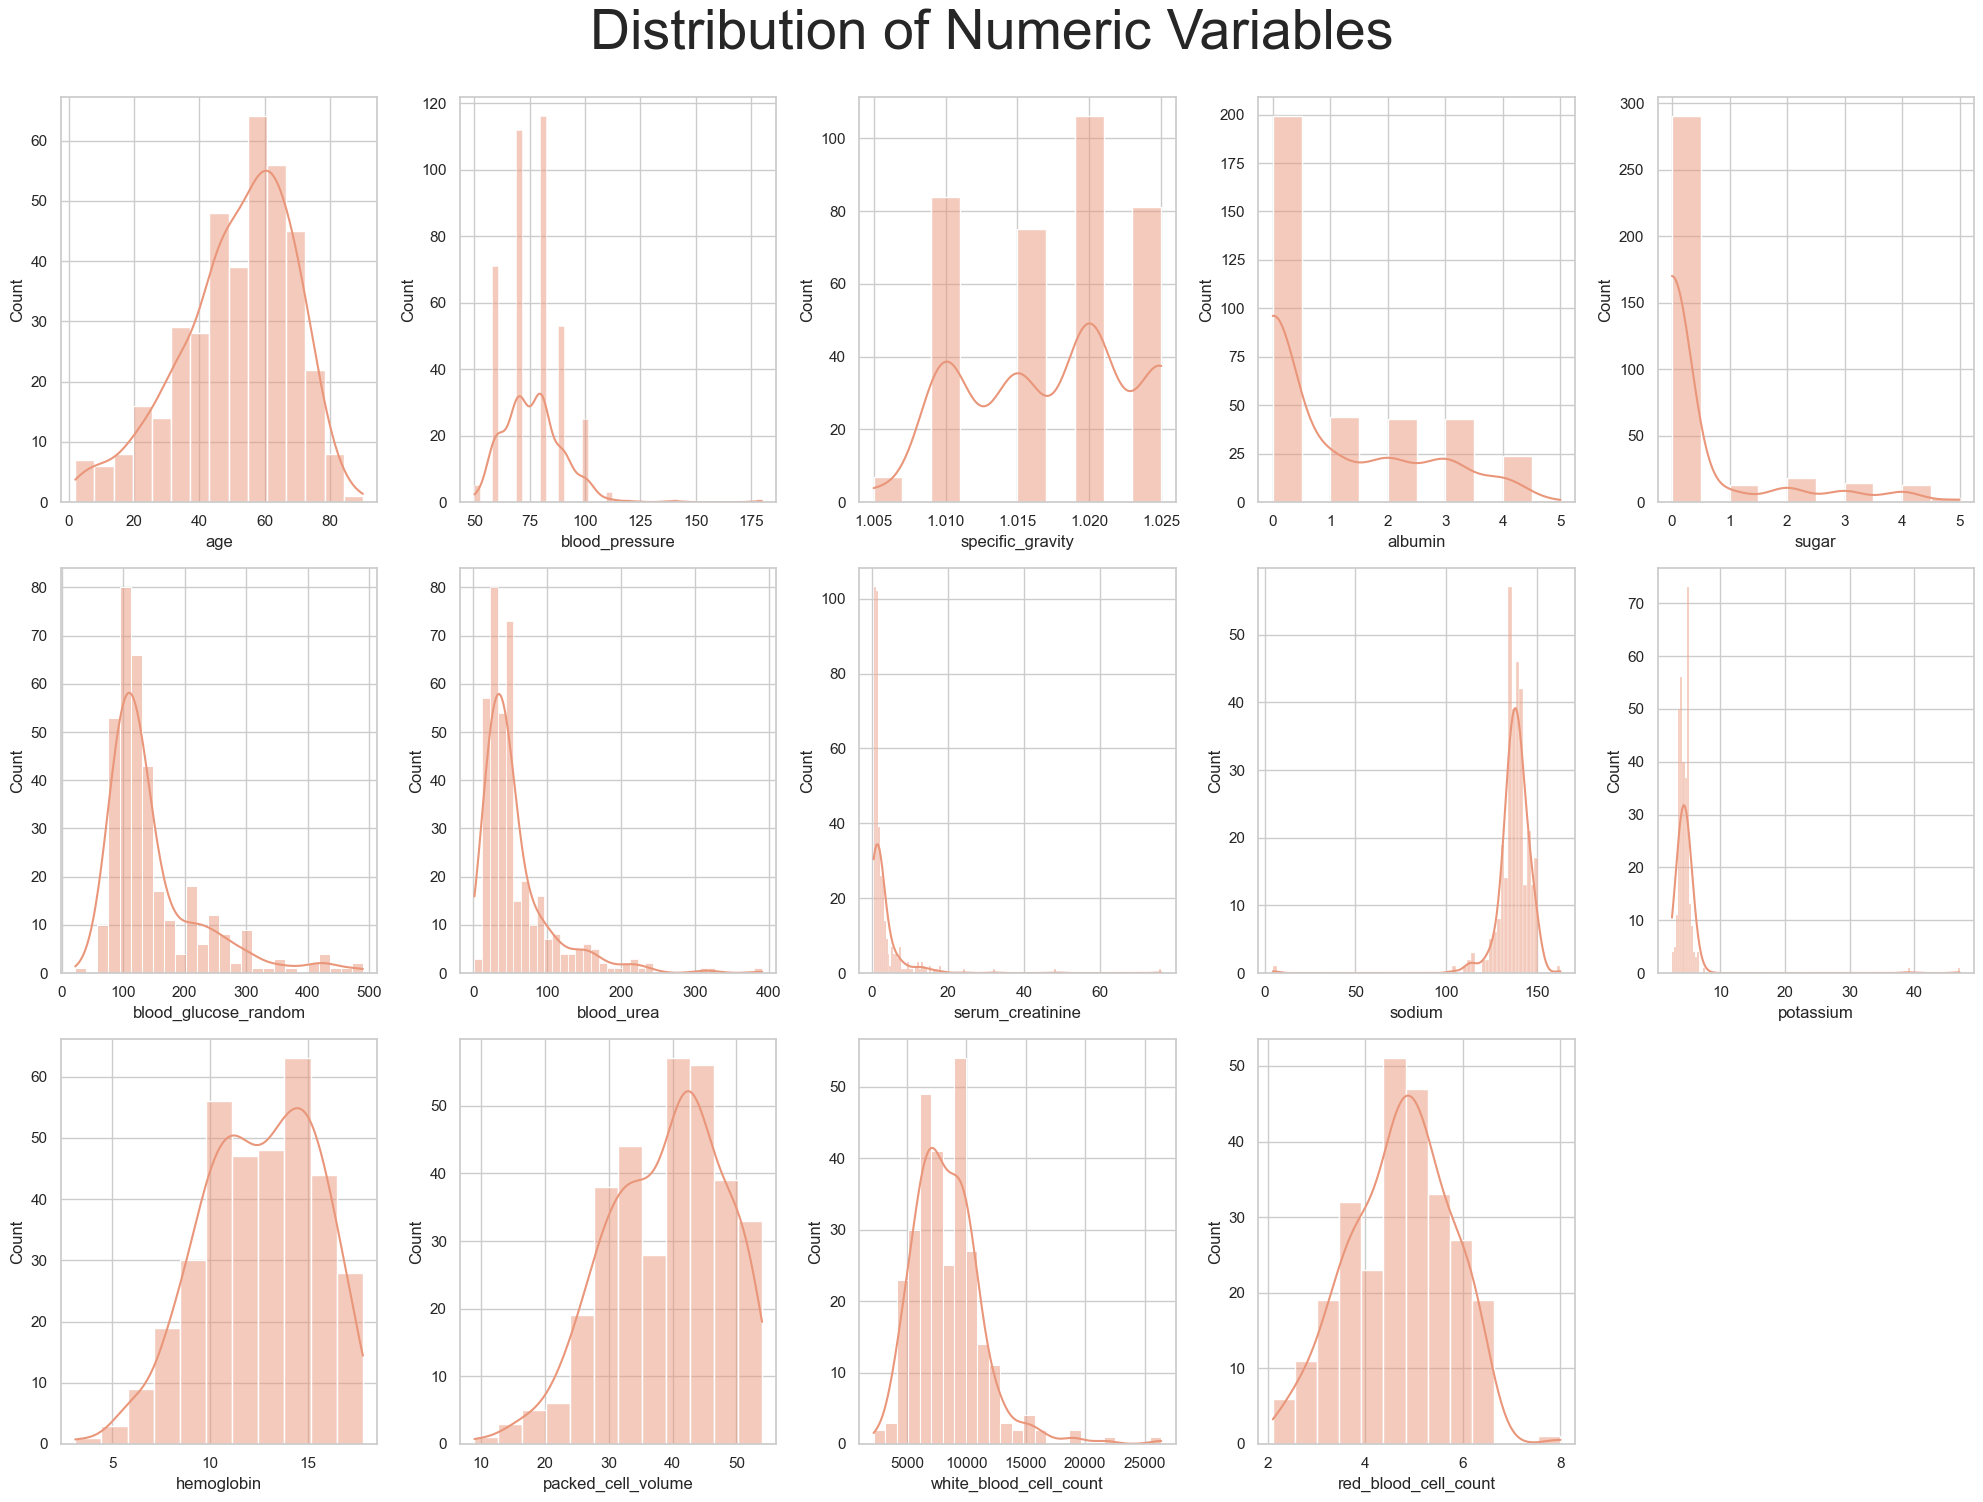

In [132]:
# Distribution of numeric variables
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column], kde=True, color='darksalmon')
        plt.xlabel(column)
        
    plotnumber += 1

plt.suptitle('Distribution of Numeric Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

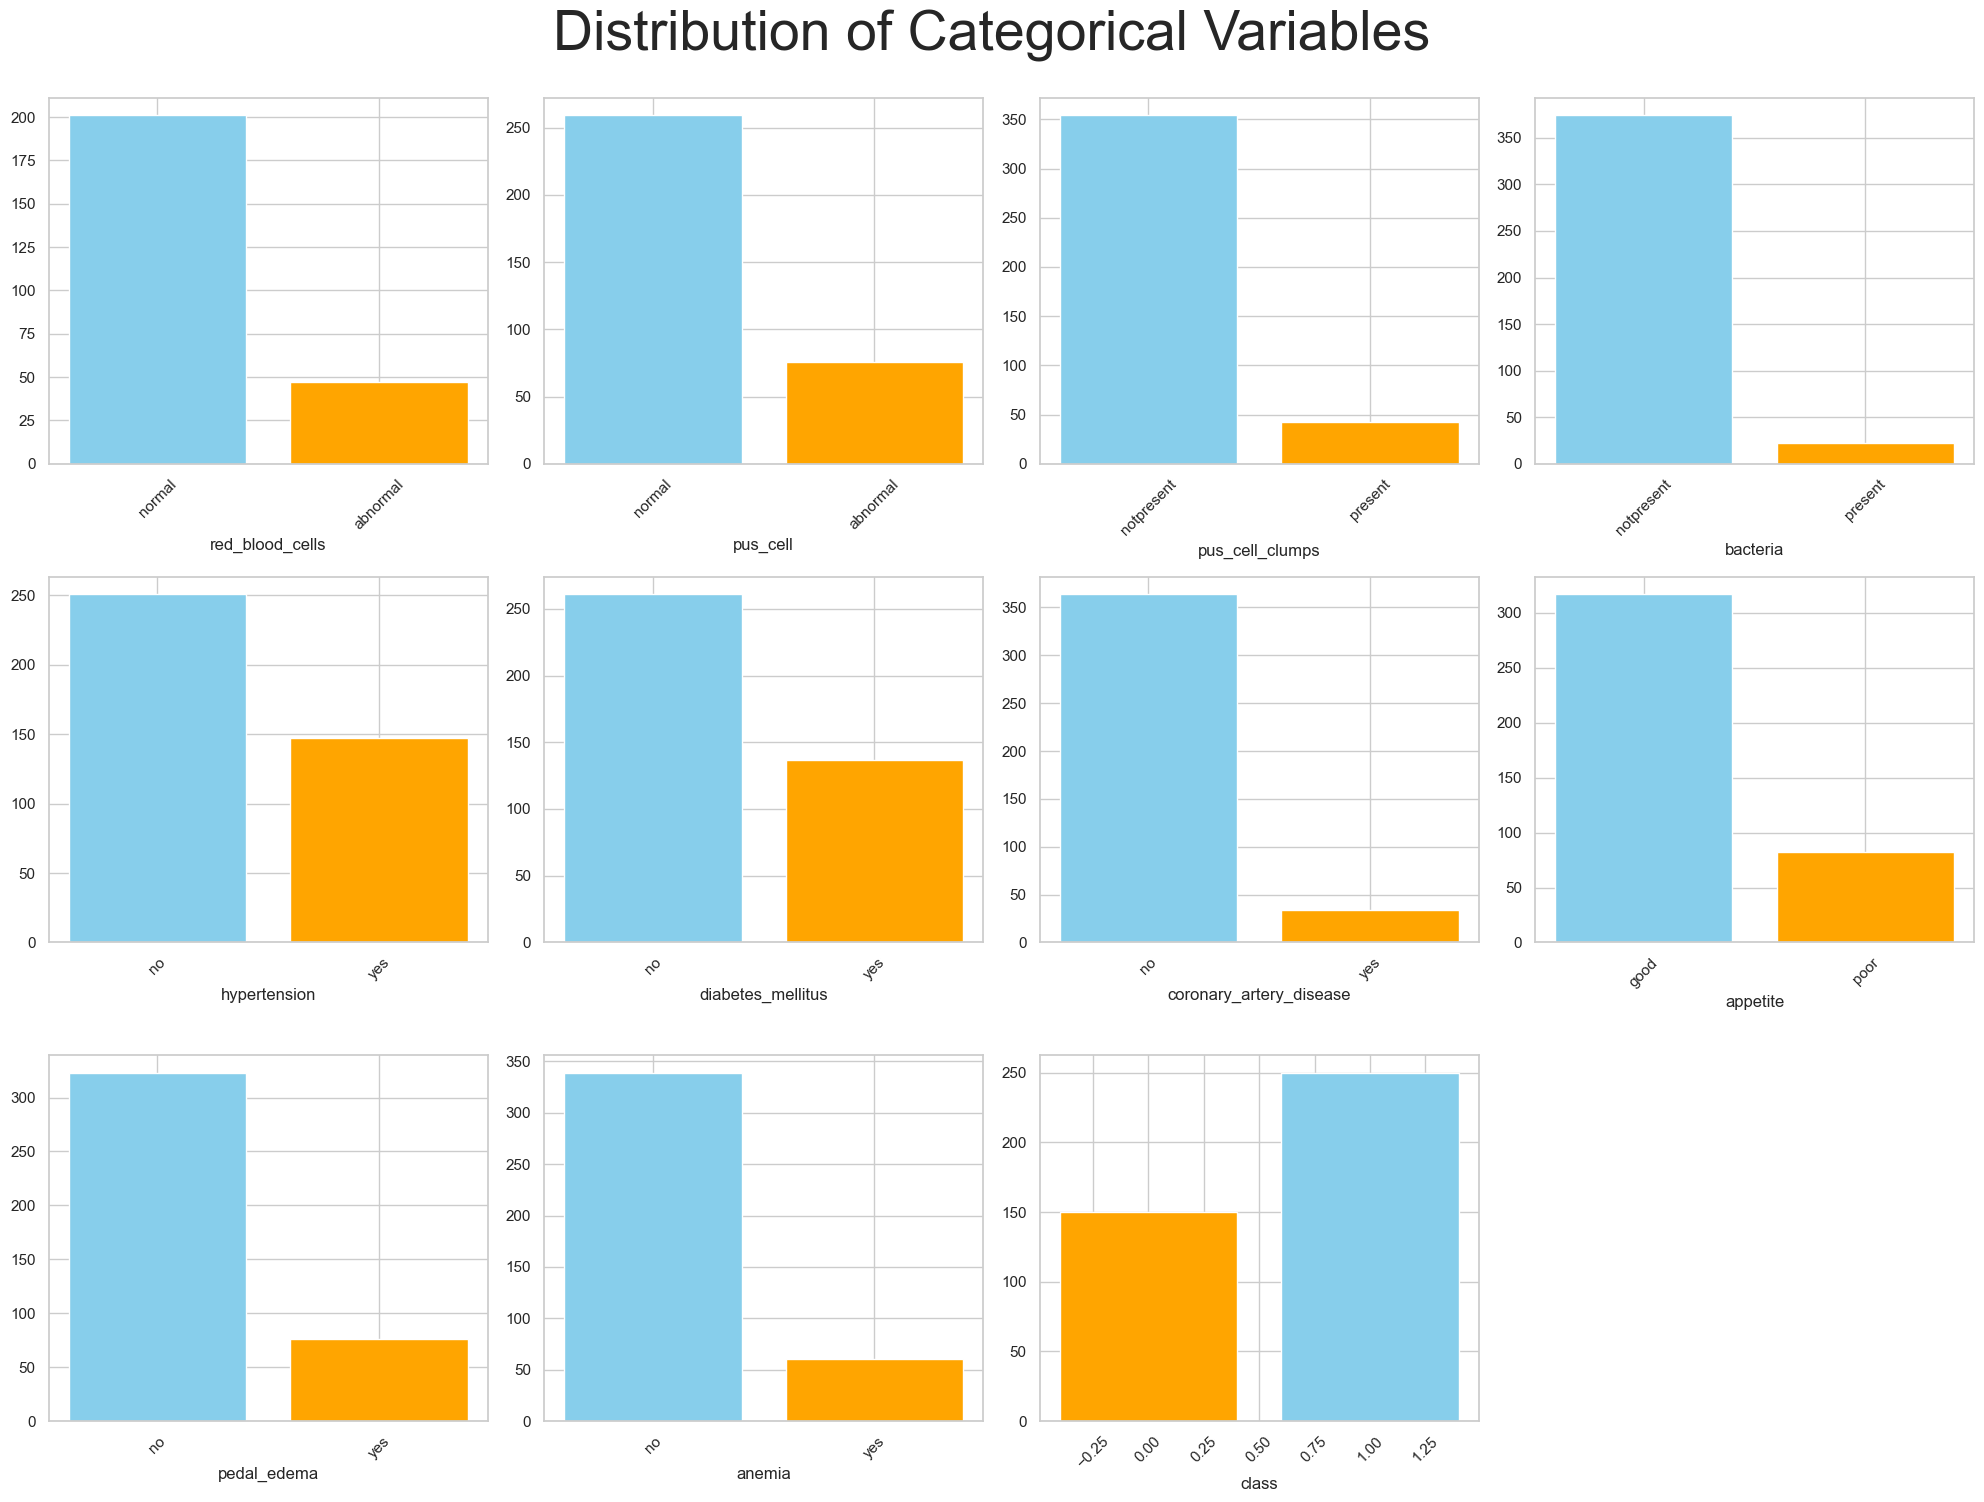

In [133]:
# Distribution of categorical variables
plt.figure(figsize=(20, 15))
plotnumber = 1

colors = ['skyblue', 'orange', 'lightgreen', 'salmon', 'lightcoral', 'cyan', 'pink']

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        # sns.countplot(df[column], palette = 'pastel')
        counts = df[column].value_counts()
        ax.bar(counts.index, counts.values, color=colors[:len(counts)])
        plt.xlabel(column)
        plt.xticks(rotation=45)
        plt.xlabel(column)
        
    plotnumber += 1

plt.suptitle('Distribution of Categorical Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

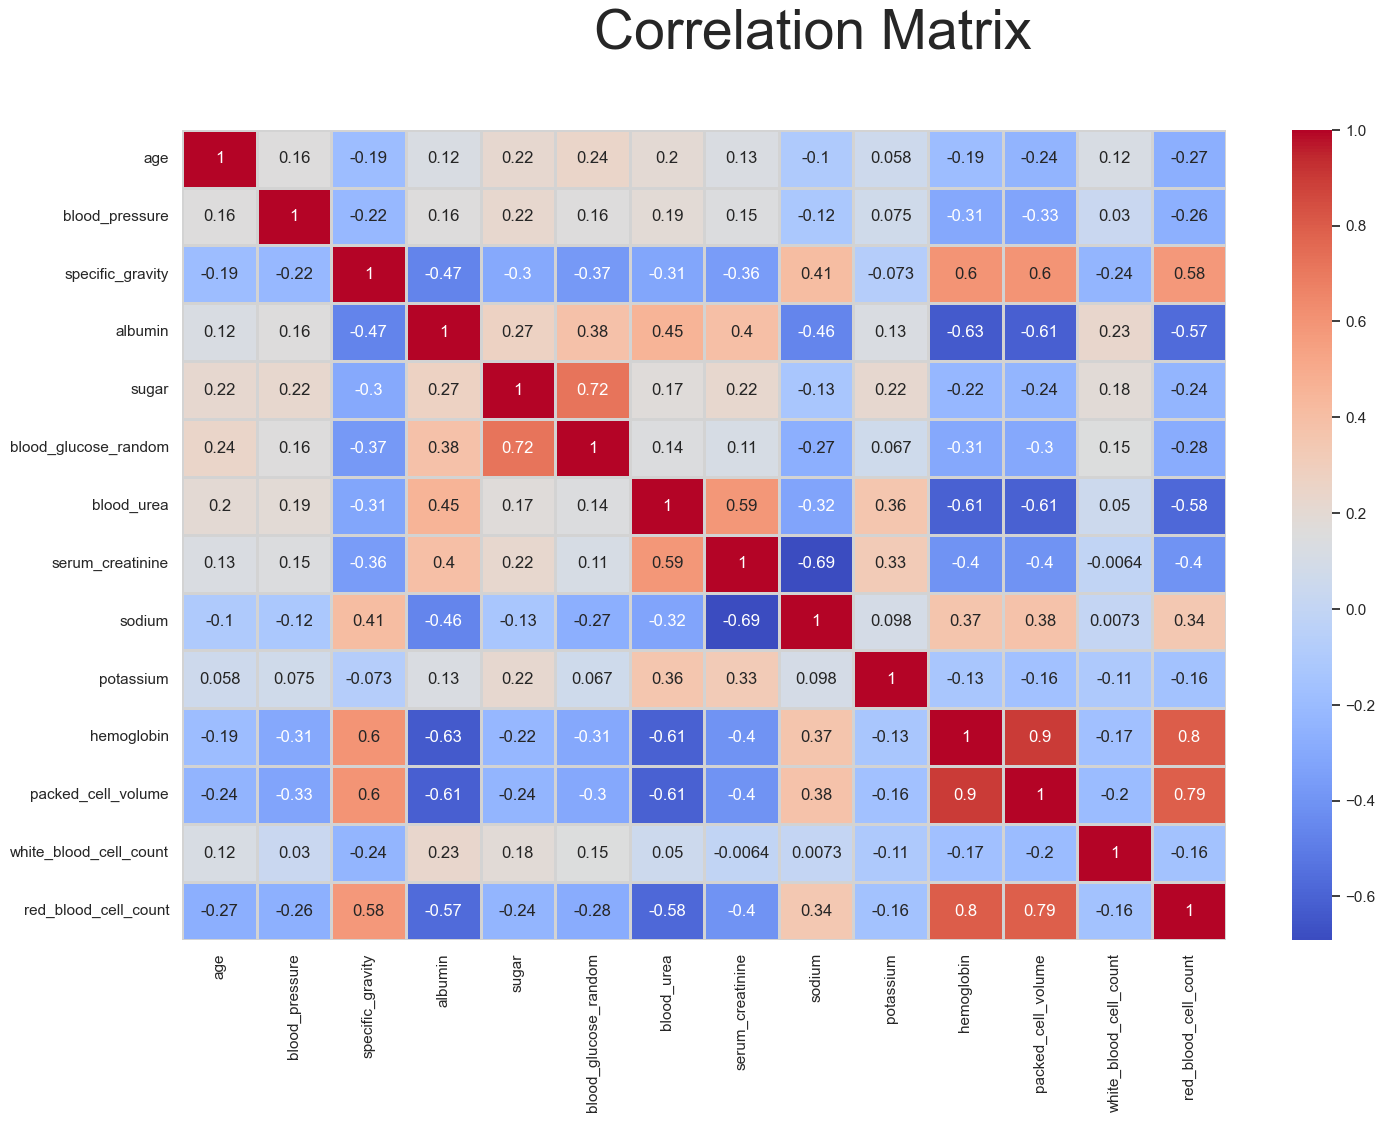

In [134]:
# Correlation matrix of numeric columns
num_df = df[num_cols]

plt.figure(figsize=(15, 10))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', linewidths=2, linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=40, y=1)
plt.show()

In [135]:
fig = px.violin(df, y='red_blood_cell_count', x="class", color="class",
                box=True, points='all', hover_data=df.columns)
fig.show()

In [136]:
fig = px.violin(df, y='packed_cell_volume', x="class", color="class",
                box=True, points='all', hover_data=df.columns)
fig.show()

In [137]:
fig = px.violin(df, y='hemoglobin', x="class", color="class", box=True,
                points='all', hover_data=df.columns)
fig.show()

In [138]:
fig = px.violin(df, y='serum_creatinine', x="class", color="class", box=True,
                points='all', hover_data=df.columns)
fig.show()

In [139]:
fig = px.scatter(df, x='red_blood_cell_count', y='packed_cell_volume', color="class")
fig.update_layout(width=1000, height=800)
fig.show()

In [140]:
fig = px.scatter(df, x='red_blood_cell_count', y='hemoglobin', color="class")
fig.update_layout(width=1000, height=800)
fig.show()

In [141]:
fig = px.scatter(df, x='hemoglobin', y='packed_cell_volume', color="class")
fig.update_layout(width=1000, height=800)
fig.show()

# <p style="background-color: #FDD835; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>4. Missing Data Imputation</strong></p>

In [142]:
# View missing values
df.isna().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
hemoglobin                  52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

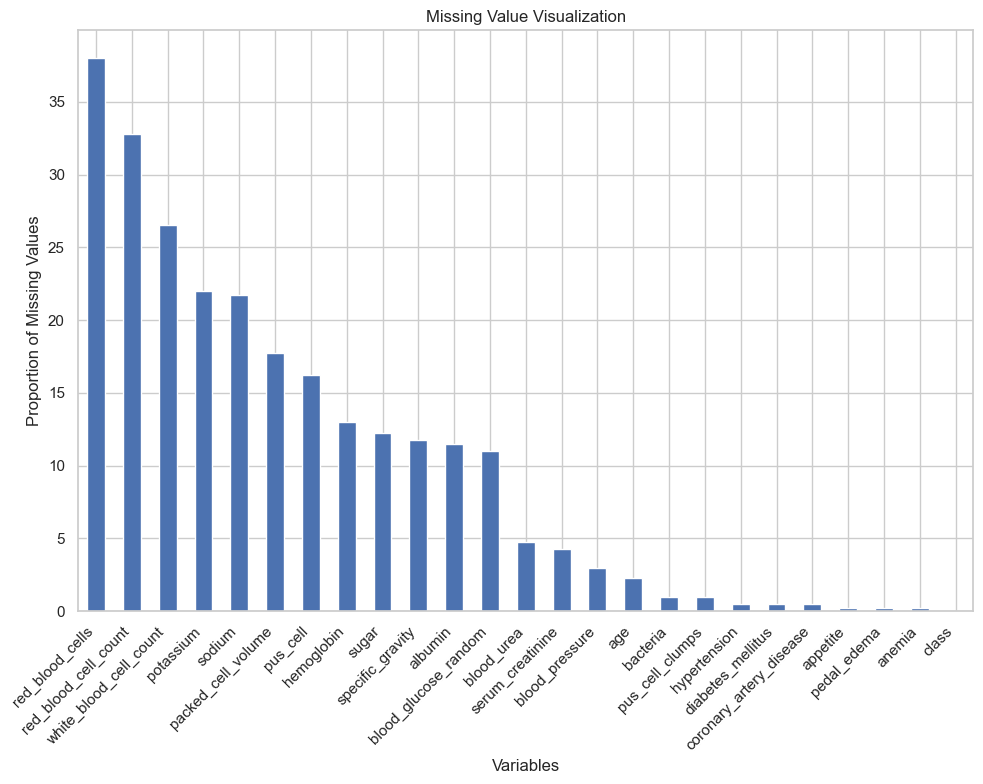

In [143]:
# Visualize missing values
# Count the number of missing values in each column
missing_values = (df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
missing_values.plot(kind='bar')
plt.title('Missing Value Visualization')
plt.xlabel('Variables')
plt.ylabel('Proportion of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [144]:
# Check missing values for numeric columns
df[num_cols].isnull().sum().sort_values(ascending=False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
hemoglobin                 52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
dtype: int64

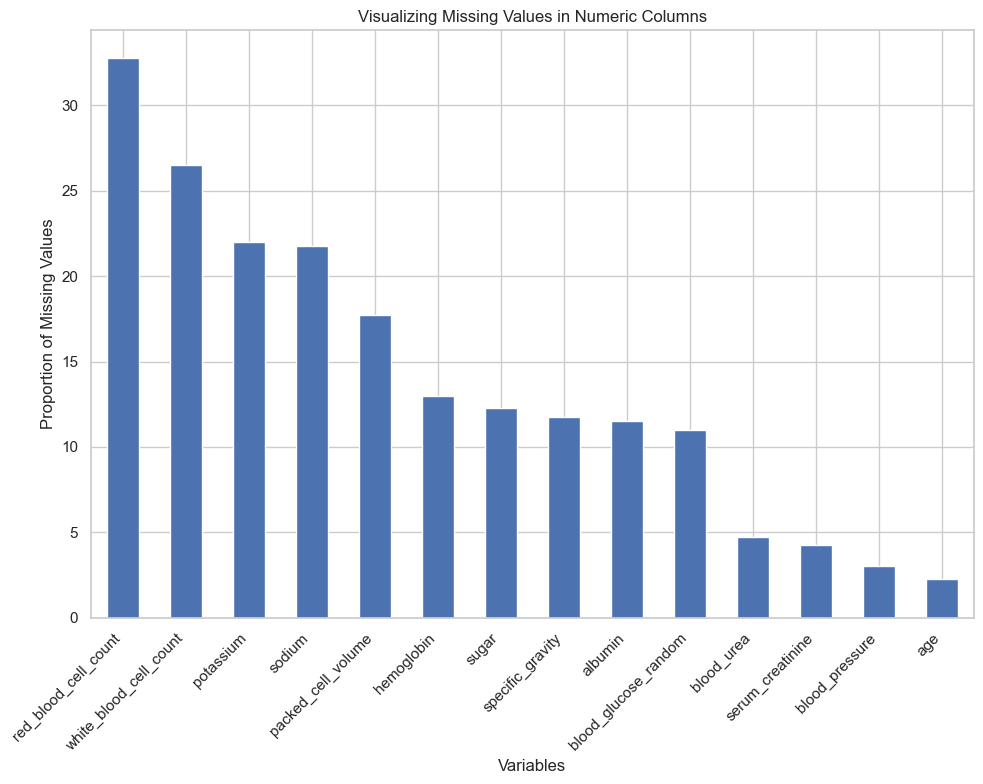

In [145]:
# Visualize missing values in numeric columns
# Count the number of missing values in each column
missing_values = (df[num_cols].isna().sum()/df.shape[0]*100).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
missing_values.plot(kind='bar')
plt.title('Visualizing Missing Values in Numeric Columns')
plt.xlabel('Variables')
plt.ylabel('Proportion of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [146]:
# Check missing values for categorical columns
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

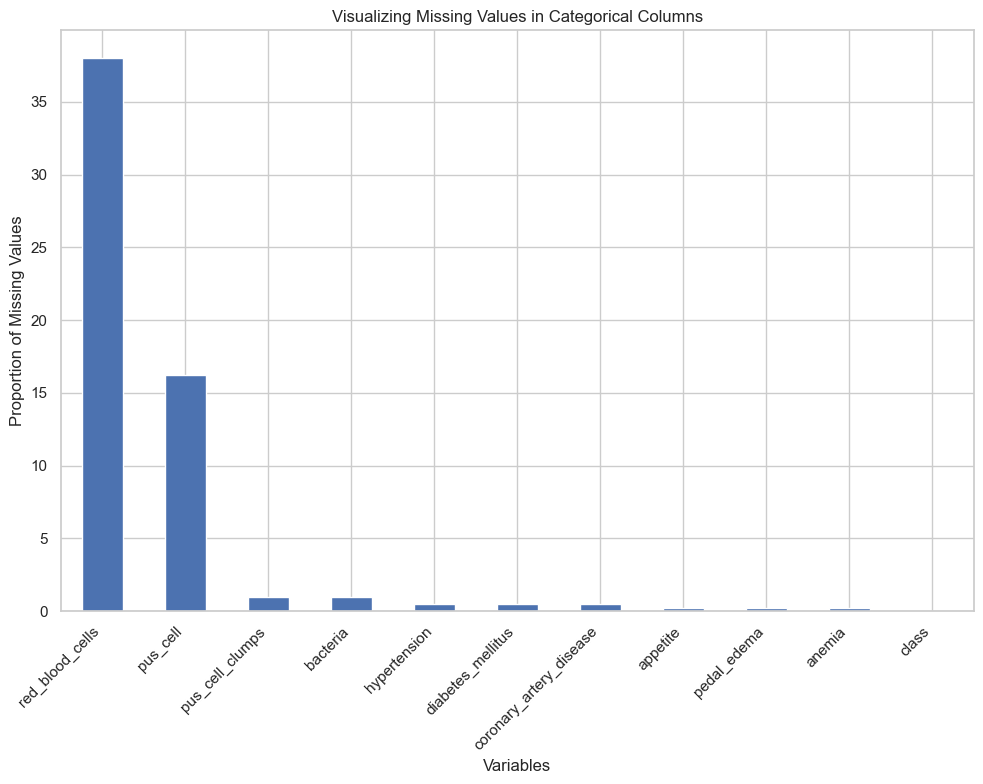

In [147]:
# Visualize missing values in categorical columns
# Count the number of missing values in each column
missing_values = (df[cat_cols].isna().sum()/df.shape[0]*100).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
missing_values.plot(kind='bar')
plt.title('Visualizing Missing Values in Categorical Columns')
plt.xlabel('Variables')
plt.ylabel('Proportion of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [148]:
# Fill missing values in numeric columns
# Multiple iterations of interpolation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create IterativeImputer object
imputer = IterativeImputer(random_state=0, max_iter=10, sample_posterior=True)
# Use IterativeImputer to fill in missing values
df[num_cols] = imputer.fit_transform(df[num_cols])

In [149]:
# Make sure all missing values have been filled in
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [150]:
# For feature columns with many missing values: use random values to fill in
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

# For feature columns with relatively few missing values: use the mode to fill in
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)
    
# For the categorical columns red_blood_cells and pus_cell, use random sampling to fill
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

# For other categorical data columns, use the mode to fill
for col in cat_cols:
    impute_mode(col)

In [151]:
# Make sure all missing values have been filled in
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [152]:
# Check the variance inflation factor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add constant term
df_vif = df.copy()
df_vif['const'] = 1

# Select the columns for which VIF needs to be calculated
X = df_vif[num_cols + ['const']]

# Calculate VIF
vif_info = pd.DataFrame()
vif_info['Column'] = X.columns
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info = vif_info.sort_values('VIF', ascending=False)

# Show results
vif_info

Column           VIF
14                   const  41231.054852
10              hemoglobin      5.524807
11      packed_cell_volume      5.148068
7         serum_creatinine      2.973746
8                   sodium      2.338351
6               blood_urea      2.296930
13    red_blood_cell_count      2.242119
5     blood_glucose_random      2.193500
4                    sugar      2.088330
3                  albumin      1.730245
2         specific_gravity      1.671489
9                potassium      1.173463
1           blood_pressure      1.165548
0                      age      1.134099
12  white_blood_cell_count      1.099653

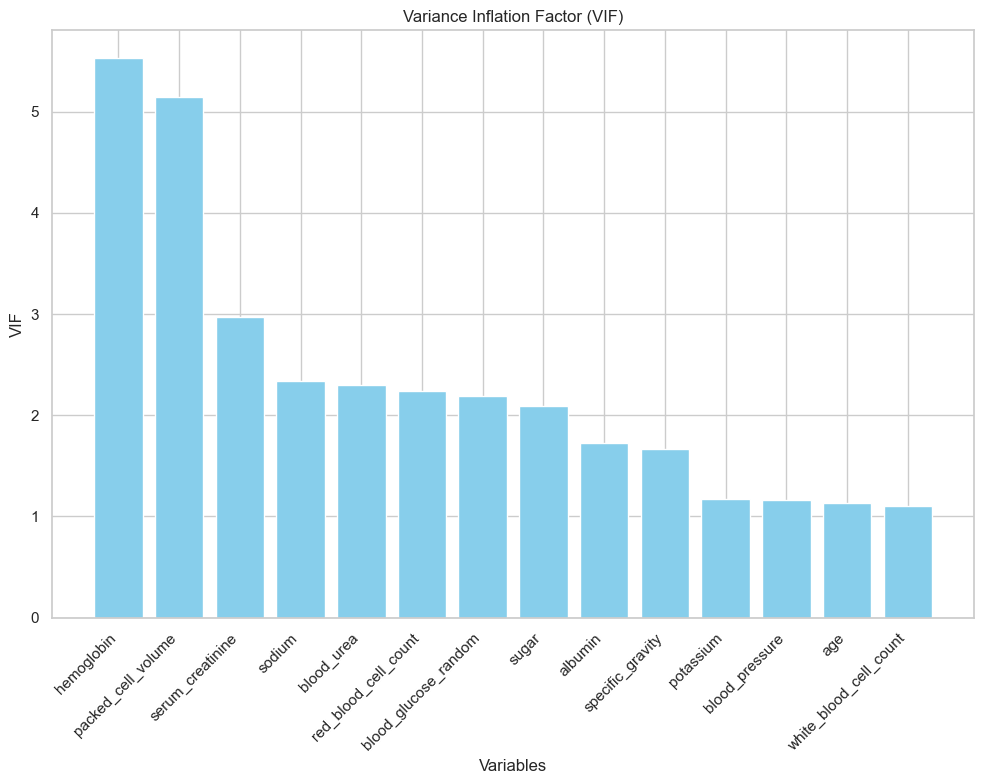

In [153]:
# Result visualization
# Remove const columns
vif_info_filtered = vif_info[vif_info['Column'] != 'const']
vif_info_sorted = vif_info_filtered.sort_values('VIF', ascending=False)

plt.figure(figsize=(10, 8))
plt.bar(vif_info_sorted['Column'], vif_info_sorted['VIF'], color='skyblue')
plt.xlabel('Variables')
plt.ylabel('VIF')
plt.title('Variance Inflation Factor (VIF)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# <p style="background-color: #FDD835; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>5. Feature Encoding</strong></p>

In [154]:
# Check the number of categories in the category column
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

pedal_edema has 2 categories

anemia has 2 categories

class has 2 categories



In [155]:
# Feature encoding (label encoding)
# Convert categories to numeric values ​​using category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    int32  
 6   pus_cell                 400 non-null    int32  
 7   pus_cell_clumps          400 non-null    int32  
 8   bacteria                 400 non-null    int32  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  hemoglobin               400 no

# <p style="background-color: #FDD835; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>6. Modelling</strong></p>

In [157]:
# Prepare training data for the machine learning model
# Define independent variables
ind_col = [col for col in df.columns if col!='class']
# Define dependent variable
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [158]:
from sklearn.model_selection import train_test_split

# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [159]:
from sklearn.preprocessing import StandardScaler

# Features normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>6.1 K-Nearest Neighbors (KNN)</strong></p>

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        72
           1       1.00      0.88      0.93       128

    accuracy                           0.92       200
   macro avg       0.91      0.94      0.92       200
weighted avg       0.93      0.92      0.92       200



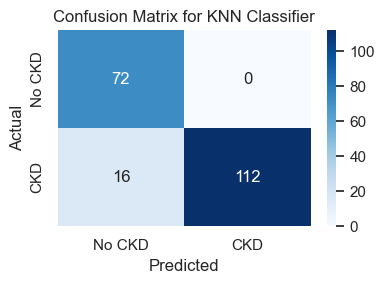

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Create KNN classifier
knn = KNeighborsClassifier()

# Train KNN classifier
knn.fit(X_train, y_train)

# Use the trained model for prediction
y_pred = knn.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a classification report
class_report = classification_report(y_test, y_pred)

# Display the classification report
print("Classification Report:")
print(class_report)

# Plotting the Confusion Matrix
plt.figure(figsize=(4, 3))  # Smaller figure size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No CKD', 'CKD'], yticklabels=['No CKD', 'CKD'])
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('small_confusion_matrix.png')  # Save the confusion matrix image
plt.show()


# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>6.2 Gaussian Naive Bayes</strong></p>

Training Accuracy of Gaussian Naive Bayes is 0.945

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91        72
           1       0.99      0.90      0.94       128

    accuracy                           0.93       200
   macro avg       0.92      0.94      0.93       200
weighted avg       0.94      0.93      0.93       200



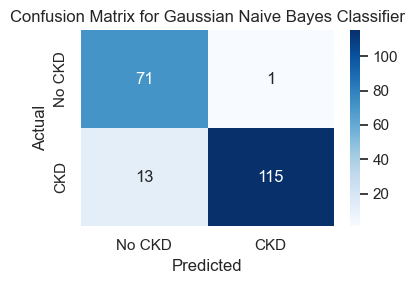

In [208]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Create Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Print training accuracy
print(f'Training Accuracy of Gaussian Naive Bayes is {accuracy_score(y_train, gnb.predict(X_train))}\n')

# Calculate evaluation metrics
gnb_accuracy = accuracy_score(y_test, y_pred)
gnb_precision = precision_score(y_test, y_pred, average='macro')
gnb_recall = recall_score(y_test, y_pred, average='macro')
gnb_f1_score = f1_score(y_test, y_pred, average='macro')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create and display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plotting the Confusion Matrix
plt.figure(figsize=(4, 3))  # Smaller figure size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No CKD', 'CKD'], yticklabels=['No CKD', 'CKD'])
plt.title('Confusion Matrix for Gaussian Naive Bayes Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>6.3 Extra Trees</strong></p>

Training Accuracy of Extra Trees is 1.0

Classification Report for Extra Trees:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.98      0.99       128

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



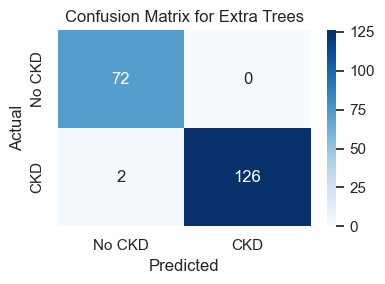

In [213]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)

print(f'Training Accuracy of Extra Trees is {accuracy_score(y_train, etc.predict(X_train))}\n')

etc_accuracy = accuracy_score(y_test, y_pred)
etc_precision = precision_score(y_test, y_pred, average='macro')
etc_recall = recall_score(y_test, y_pred, average='macro')
etc_f1_score = f1_score(y_test, y_pred, average='macro')

conf_matrix = confusion_matrix(y_test, y_pred)

# Create and display the classification report
print("Classification Report for Extra Trees:")
print(classification_report(y_test, y_pred))

# Plotting the Confusion Matrix
plt.figure(figsize=(4, 3))  # Smaller figure size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No CKD', 'CKD'], yticklabels=['No CKD', 'CKD'])
plt.title('Confusion Matrix for Extra Trees')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>6.4 eXtreme Gradient Boosting (XGBoost)</strong></p>

Training Accuracy of XGBoost is 1.0

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.97      0.98       128

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



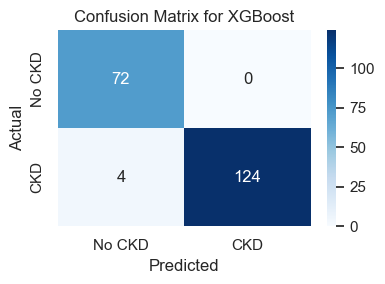

In [214]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(f'Training Accuracy of XGBoost is {accuracy_score(y_train, xgb.predict(X_train))}\n')

xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred, average='macro')
xgb_recall = recall_score(y_test, y_pred, average='macro')
xgb_f1_score = f1_score(y_test, y_pred, average='macro')

conf_matrix = confusion_matrix(y_test, y_pred)

# Create and display the classification report
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred))

# Plotting the Confusion Matrix
plt.figure(figsize=(4, 3))  # Smaller figure size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No CKD', 'CKD'], yticklabels=['No CKD', 'CKD'])
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>6.5 Light Gradient Boosting Machine (LightGBM)</strong></p>

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

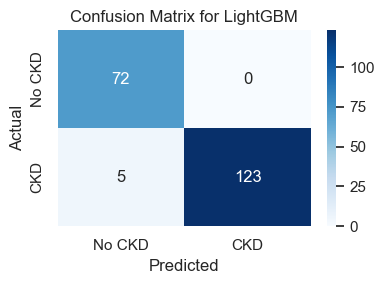

In [211]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(verbose=0)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

print(f'Training Accuracy of LGBM is {accuracy_score(y_train, lgbm.predict(X_train))}\n')

lgbm_accuracy = accuracy_score(y_test, y_pred)
lgbm_precision = precision_score(y_test, y_pred, average='macro')
lgbm_recall = recall_score(y_test, y_pred, average='macro')
lgbm_f1_score = f1_score(y_test, y_pred, average='macro')

conf_matrix = confusion_matrix(y_test, y_pred)

# Create and display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plotting the Confusion Matrix
plt.figure(figsize=(4, 3))  # Smaller figure size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No CKD', 'CKD'], yticklabels=['No CKD', 'CKD'])
plt.title('Confusion Matrix for LightGBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>6.6 Multilayer Perceptron (MLP)</strong></p>

Training Accuracy of MLP is 1.0

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        72
           1       1.00      0.95      0.97       128

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



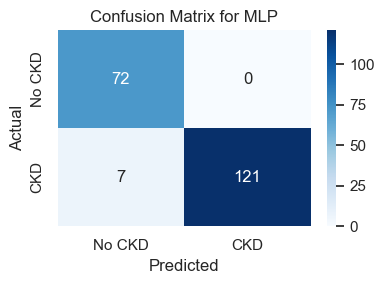

In [212]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print(f'Training Accuracy of MLP is {accuracy_score(y_train, mlp.predict(X_train))}\n')

mlp_accuracy = accuracy_score(y_test, y_pred)
mlp_precision = precision_score(y_test, y_pred, average='macro')
mlp_recall = recall_score(y_test, y_pred, average='macro')
mlp_f1_score = f1_score(y_test, y_pred, average='macro')

conf_matrix = confusion_matrix(y_test, y_pred)

# Create and display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plotting the Confusion Matrix
plt.figure(figsize=(4, 3))  # Smaller figure size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No CKD', 'CKD'], yticklabels=['No CKD', 'CKD'])
plt.title('Confusion Matrix for MLP')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

sns.catplot(data=df, x="class", y="age", hue="pedal_edema", kind="swarm")# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>6.15 Model Comparison</strong></p>

In [166]:
accuracy = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Extra Trees','XGBoost', 'LightGBM', 'MLP'],
    'Score': [knn_accuracy, gnb_accuracy, etc_accuracy,xgb_accuracy,lgbm_accuracy, mlp_accuracy]
})

accuracy_sorted = accuracy.sort_values(by='Score', ascending=False)
accuracy_sorted

Model  Score
2           Extra Trees  0.985
3               XGBoost  0.980
4              LightGBM  0.975
5                   MLP  0.965
1  Gaussian Naive Bayes  0.930
0                   KNN  0.920

In [167]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'browser'

fig = px.bar(data_frame=accuracy_sorted, x='Score', y='Model', color='Score',
             title='Accuracy Comparison', text='Score')
fig.update_layout(width=1000, height=800)
fig.show()


In [168]:
precision = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes','Extra Trees','XGBoost', 'LightGBM', 'MLP'],
    'Score': [knn_precision, gnb_precision, etc_precision,xgb_precision,lgbm_precision, mlp_precision]
})

precision_sorted = precision.sort_values(by='Score', ascending=False)
precision_sorted

Model     Score
2           Extra Trees  0.982364
3               XGBoost  0.973684
4              LightGBM  0.967532
5                   MLP  0.955696
1  Gaussian Naive Bayes  0.918309
0                   KNN  0.909091

In [169]:
fig = px.bar(data_frame = precision_sorted, x='Score', y='Model', color='Score', 
             title='Precision Comparison', text='Score')
fig.update_layout(width=1000, height=800)
fig.show()

In [170]:
recall = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Extra Trees', 'XGBoost','LightGBM', 'MLP'],
    'Score': [knn_recall, gnb_recall, etc_recall,xgb_recall, lgbm_recall, mlp_recall]
})

recall_sorted = recall.sort_values(by='Score', ascending=False)
recall_sorted

Model     Score
2           Extra Trees  0.985243
3               XGBoost  0.984375
4              LightGBM  0.980469
5                   MLP  0.972656
1  Gaussian Naive Bayes  0.942274
0                   KNN  0.937500

In [171]:
fig = px.bar(data_frame = recall_sorted, x='Score', y='Model', color='Score', 
             title='Recall Comparison', text='Score')
fig.update_layout(width=1000, height=800)
fig.show()

In [172]:
f1_score = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes','Extra Trees','XGBoost','LightGBM', 'MLP'],
    'Score': [knn_f1_score, gnb_f1_score, etc_f1_score,xgb_f1_score, lgbm_f1_score, mlp_f1_score]
})

f1_score_sorted = f1_score.sort_values(by='Score', ascending=False)
f1_score_sorted

Model     Score
2           Extra Trees  0.983773
3               XGBoost  0.978550
4              LightGBM  0.973261
5                   MLP  0.962765
1  Gaussian Naive Bayes  0.926440
0                   KNN  0.916667

In [ ]:
fig = px.bar(data_frame = f1_score_sorted, x='Score', y='Model', color='Score', 
             title='F1_score Comparison', text='Score')
fig.update_layout(width=1000, height=800)
fig.show()

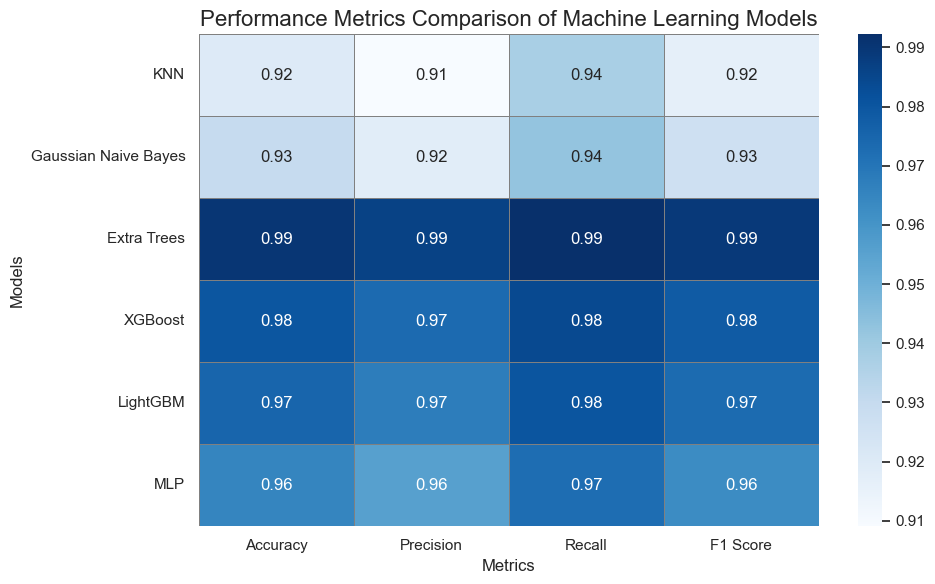

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming these variables are already defined in your previous code
# knn_accuracy, gnb_accuracy, etc_accuracy, xgb_accuracy, lgbm_accuracy, mlp_accuracy
# knn_precision, gnb_precision, etc_precision, xgb_precision, lgbm_precision, mlp_precision
# knn_recall, gnb_recall, etc_recall, xgb_recall, lgbm_recall, mlp_recall
# knn_f1_score, gnb_f1_score, etc_f1_score, xgb_f1_score, lgbm_f1_score, mlp_f1_score

models = ['KNN', 'Gaussian Naive Bayes', 'Extra Trees', 'XGBoost', 'LightGBM', 'MLP']

# Create a DataFrame with existing variables
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': [knn_accuracy, gnb_accuracy, etc_accuracy, xgb_accuracy, lgbm_accuracy, mlp_accuracy],
    'Precision': [knn_precision, gnb_precision, etc_precision, xgb_precision, lgbm_precision, mlp_precision],
    'Recall': [knn_recall, gnb_recall, etc_recall, xgb_recall, lgbm_recall, mlp_recall],
    'F1 Score': [knn_f1_score, gnb_f1_score, etc_f1_score, xgb_f1_score, lgbm_f1_score, mlp_f1_score]
})

# Create a heatmap for visualization
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df.iloc[:, 1:], annot=True, fmt=".2f", cmap='Blues', cbar=True,
            linewidths=.5, linecolor='gray', xticklabels=metrics_df.columns[1:], yticklabels=metrics_df['Model'])

# Title and labels
plt.title('Performance Metrics Comparison of Machine Learning Models', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Models', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


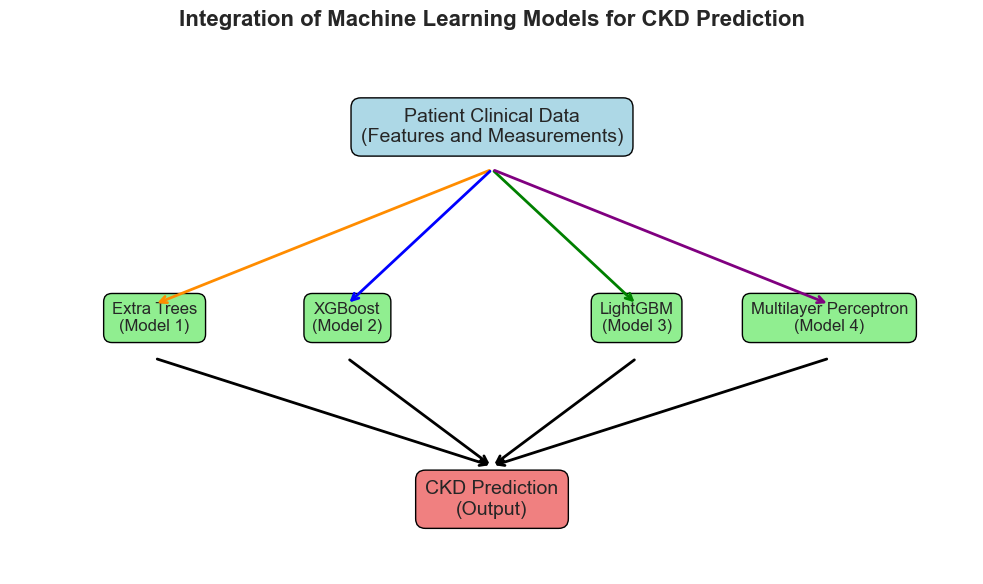

In [197]:
import matplotlib.pyplot as plt

def draw_flowchart():
    fig, ax = plt.subplots(figsize=(10, 6))

    # Input
    ax.text(0.5, 0.8, 'Patient Clinical Data\n(Features and Measurements)', ha='center', fontsize=14, 
            bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='lightblue'))

    # Models positions
    model_labels = ['Extra Trees\n(Model 1)', 'XGBoost\n(Model 2)', 'LightGBM\n(Model 3)', 'Multilayer Perceptron\n(Model 4)']
    model_x_positions = [0.15, 0.35, 0.65, 0.85]
    colors = ['darkorange', 'blue', 'green', 'purple']  # Different colors for input arrows

    for i, x in enumerate(model_x_positions):
        ax.text(x, 0.45, model_labels[i], ha='center', fontsize=12, 
                bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='lightgreen'))

        # Arrows from input to models
        ax.annotate('', xy=(x, 0.5), xytext=(0.5, 0.75), 
                    arrowprops=dict(arrowstyle='->', lw=2, color=colors[i]))

    # Final prediction
    ax.text(0.5, 0.11, 'CKD Prediction\n(Output)', ha='center', fontsize=14, 
            bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='lightcoral'))

    # Arrows from models to final prediction (set to black)
    for x in model_x_positions:
        ax.annotate('', xy=(0.5, 0.2), xytext=(x, 0.4), 
                    arrowprops=dict(arrowstyle='->', lw=2, color='black'))

    # Hide axes
    ax.axis('off')
    plt.title('Integration of Machine Learning Models for CKD Prediction', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

draw_flowchart()
